#**Understanding problematics in the vulnerable population of Metropolitan Area of Bucaramanga**

In [ ]:
# Libraries
from google.colab import drive
from IPython.display import IFrame
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import folium  #needed for interactive map
from folium.plugins import HeatMap
import geopandas as gpd
import fiona
%matplotlib inline
sns.set()
pd.options.display.max_columns = 40

Mounted at /content/drive


ModuleNotFoundError: ignored

# Dashboard problematics in the vulnerable population of Bucaramanga

In [ ]:
# Dahsboard
IFrame('https://app.powerbi.com/view?r=eyJrIjoiZDQ3ZGQxYjAtY2ExMS00YTQ4LThhODItNTk3MjE4YjUyYWUzIiwidCI6IjQ0N2ViNTFjLWRlOGQtNGE2ZC1iNDVkLTAxNTYwN2RmYzk1MSJ9', width=800, height=600)

## **SISBEN 2022**

The Sisbén is an instrument (survey) applied by the Colombian State to know the needs and capacities of households, and based on the results associated with this survey, citizens are prioritized so that they can access social programs.

In Sisbén IV there will be four groups:

- **Group A**, made up of the population with the least capacity to generate income or the population in extreme poverty.
- **Group B**, made up of poor households, but with a greater capacity to generate income than those in group A.
- **Group C**, made up of vulnerable population or at risk of falling into poverty.
- **Group D**, made up of a population that is neither poor nor vulnerable.

Each group is made up of subgroups, made up of a letter and a number, and which also differ in terms of their greater or lesser capacity to generate income. In this way, group A is made up of 5 subgroups (A1-A5), B by 7 (B1-B7), C by 18 (C1-C18) and finally group D by 21 subgroups (D1-D21). As an example, a person at level A1 will have a lower ability to generate income than that of A5.
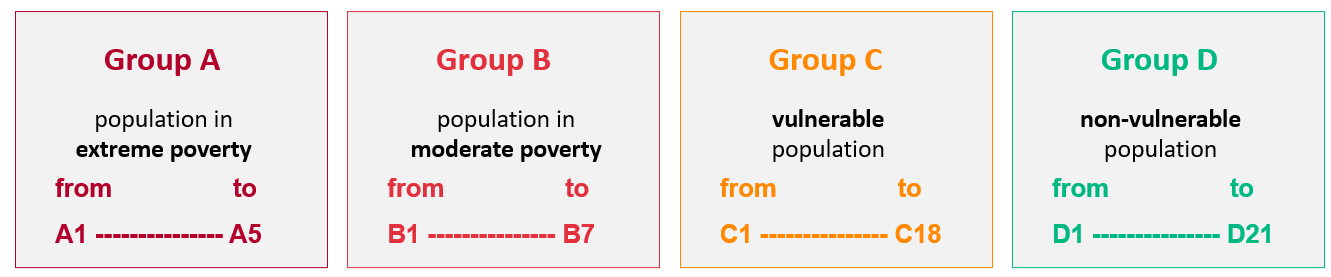

In [ ]:
# Load data sisben_2022
sisben_2022 = pd.read_csv('/content/drive/MyDrive/Team 111 DS4A - Project/Data/sisben_2022_ds4a.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (246,247) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Sampling of the dataset with three rows
sisben_2022.sample(3)

,documento,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,...,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion,Latitud,Longitud,BARRIO,COMUNA
118800,118801,68,SANTANDER,68001,BUCARAMANGA,2019-08-23 18:44:23.677,23,17862,6.800100e+19,11,...,0,1.455984e+10,0,NaN,5.7,B07,7.08032046,-73.11732227,GRANJAS DE PROVENZA,10. PROVENZA
132262,132263,68,SANTANDER,68001,BUCARAMANGA,2019-12-07 17:17:16.673,101,126876,6.800110e+19,1,...,43,1.078169e+10,0,NaN,7.8,B07,7.18106434,-73.12996476,VEREDA ANGELINOS,18. CORREG. 1
23418,23419,68,SANTANDER,68001,BUCARAMANGA,2019-09-25 17:42:41.477,49,53830,6.800110e+19,28,...,0,1.455984e+10,0,NaN,3.0,B07,7.11901724,-73.14112544,NAPOLES,04. OCCIDENTAL


In [ ]:
print("Number of rows and columns:", sisben_2022.shape,"\n")
print("Column names: ", sisben_2022.columns.tolist())

Number of rows and columns: (237741, 250) 

Column names:  ['documento', 'cod_dpto', 'Departamento', 'cod_mpio', 'Municipio', 'fec_paquete', 'num_paquete', 'num_ficha', 'ide_ficha_origen', 'ide_edificacion', 'ver_estructura', 'ori_encuesta', 'Cod_clase', 'Cod_centro_poblado', 'Cod_area_coordinacion', 'Cod_area_operativa', 'Cod_uni_cobertura', 'Cod_comuna_x', 'Cod_corregimiento', 'NOM_CORREGIMIENTO', 'Cod_vereda', 'NOM_VEREDA', 'Cod_barrio', 'NOM_BARRIO', 'Cod_enumerador', 'tot_viviendas', 'tot_hogares', 'ord_vivienda', 'ind_direccion', 'uso_vivienda', 'Ide_foto', 'fec_ini_encuesta', 'fec_fin_encuesta', 'Coord_x_manual_rec', 'Coord_y_manual_rec', 'Coord_x_auto_rec', 'Coord_y_auto_rec', 'Gps_Alt_auto_rec', 'Fec_captura_gps_rec', 'Gps_Distancia_rec', 'Coord_x_manual_enc', 'Coord_y_manual_enc', 'Coord_x_auto_enc', 'Coord_y_auto_enc', 'Gps_Alt_auto_enc', 'Fec_captura_gps_enc', 'Gps_Distancia_enc', 'Est_nov_cartografia', 'Cod_digitador', 'Fec_digitacion', 'ind_formato', 'Num_hogares_recuento

In [ ]:
# Selection of relevant columns
sisben_22 = sisben_2022.loc[:, [
                               #ID
                                'documento', 
                               # Families per household
                                'tot_hogares', 'Num_hogares_recuento',
                               # people in the household
                                'num_habita_vivienda', 'num_personas_hogar',
                               # population variables
                                'ide_persona', 'ide_nacional', 'ind_escaner', 'sexo_persona', 'ori_persona', 
                                'tip_documento', 'fec_nacimiento', 'edad_calculada', 'fec_documento', 'cod_dpto_documento',
                                'cod_mpio_documento', 'Cod_pais_documento', 'tip_parentesco', 'tip_estado_civil', 
                                'ind_conyuge_vive_hogar', 'ide_conyuge', 'ind_padre_vive_hogar', 'ide_padre', 
                                'ind_pariente_domestico', 'ide_serv_domestico', 'ind_discap_ver', 'ind_discap_oir', 
                                'ind_discap_hablar', 'ind_discap_moverse', 'ind_discap_bañarse', 'ind_discap_salir', 
                                'ind_discap_entender', 'ind_discap_ninguna', 'tip_seg_social', 'ind_enfermo_30', 
                                'ind_acudio_salud', 'ind_fue_atendido_salud', 'ind_esta_embarazada', 'ind_tuvo_hijos', 
                                'tip_cuidado_niños', 'ind_recibe_comida',  
                               # socioeconomic variables
                                'ind_leer_escribir', 'ind_estudia', 'niv_educativo', 'grado_alcanzado', 
                                'ind_fondo_pensiones', 'tip_actividad_mes', 'num_sem_buscando', 'tip_empleado', 
                                'ind_ingr_salario', 'vlr_ingr_salario', 'ind_ingr_honorarios', 'vlr_ingr_honorarios', 
                                'ind_ingr_cosecha', 'num_mes_ingr_cosecha', 'vlr_ingr_cosecha', 'ind_ingr_pension', 
                                'vlr_ingr_pension', 'ind_ingr_remesa_pais', 'vlr_ingr_remesa_pais', 
                                'ind_ingr_remesa_exterior', 'vlr_ingr_remesa_exterior', 'ind_ingr_arriendos', 
                                'vlr_ingr_arriendos', 'ind_otros_ingresos', 'vlr_otros_ingresos', 'ind_ingr_estado', 
                                'vlr_ingr_fam_accion', 'vlr_ingr_col_mayor', 'vlr_ingr_otro_subsidio',   
                               # Physical infrastructure variables
                                'tip_mat_paredes', 'tip_mat_pisos', 'ide_hogar', 'tip_ocupa_vivienda', 
                                'num_cuartos_exclusivos', 'num_cuartos_dormir', 'num_cuartos_unicos_dormir',
                               # Energy source
                                'ind_tiene_energia', 'tip_estrato_energia', 'ind_tiene_gas',
                               # basic sanitation
                                'ind_tiene_alcantarillado', 'ind_tiene_recoleccion', 'ind_tiene_acueducto', 
                                'tip_estrato_acueducto', 'tip_sanitario', 'tip_ubi_sanitario', 'tip_uso_sanitario', 
                                'tip_origen_agua', 'ind_agua_llega_7dias', 'tip_uso_agua_beber', 'tip_elimina_basura',
                               # Nutrition
                                 'ind_tiene_cocina', 'tip_prepara_alimentos', 'tip_uso_cocina', 'tip_energia_cocina', 'ind_tiene_nevera',  'ind_gasto_alimento', 'vlr_gasto_alimento', 
                               # welfare
                                 'ind_tiene_lavadora', 'ind_tiene_pc', 'ind_tiene_internet', 'ind_tiene_bien_raiz',
                               # transport and mobility
                                  'ind_gasto_transporte', 'vlr_gasto_transporte', 'ind_tiene_moto', 'ind_tiene_tractor', 'ind_tiene_carro',
                               # Education expenses
                                  'ind_gasto_educacion', 'vlr_gasto_educacion',
                               # health expenses
                                 'ind_gasto_salud', 'vlr_gasto_salud',
                               # Services expenses
                                 'ind_gasto_serv_publicos', 'vlr_gasto_serv_publicos', 
                               # other expenses
                                'ind_gasto_celular', 'vlr_gasto_celular', 'ind_gasto_arriendo', 'vlr_gasto_arriendo', 
                                'ind_gasto_otros', 'vlr_gasto_otros', 'vlr_total_gastos', 
                               # classification
                                 'Clasificacion',
                               # Geolocation
                                'Latitud', 'Longitud', 'BARRIO', 'COMUNA'
                            ]
                          ] 
sisben_22.sample(3)

,documento,tot_hogares,Num_hogares_recuento,num_habita_vivienda,num_personas_hogar,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,...,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,Clasificacion,Latitud,Longitud,BARRIO,COMUNA
59204,59205,1,1,3,6,1,15745069,0,2,1,...,1,450000,2,0,2000000,B05,7.09352777,-73.12671160,BUCARAMANGA,08. SUROCCIDENTE
41184,41185,1,1,3,1,1,15914874,1,2,1,...,2,0,2,0,220000,C09,7.186872,-73.131565,ASENTAMIENTO VILLA LUZ CAMPESTRE,18. CORREG. 1
113640,113641,1,1,2,3,2,15906639,0,1,1,...,1,350000,2,0,599000,C06,7.17586935,-73.13101351,CAMPESTRE NORTE,01. NORTE


In [ ]:
# Variable data type
sisben_22.info(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237741 entries, 0 to 237740
Data columns (total 125 columns):
 #    Column                     Dtype 
---   ------                     ----- 
 0    documento                  int64 
 1    tot_hogares                int64 
 2    Num_hogares_recuento       int64 
 3    num_habita_vivienda        int64 
 4    num_personas_hogar         int64 
 5    ide_persona                int64 
 6    ide_nacional               int64 
 7    ind_escaner                int64 
 8    sexo_persona               int64 
 9    ori_persona                int64 
 10   tip_documento              int64 
 11   fec_nacimiento             object
 12   edad_calculada             int64 
 13   fec_documento              object
 14   cod_dpto_documento         int64 
 15   cod_mpio_documento         int64 
 16   Cod_pais_documento         int64 
 17   tip_parentesco             int64 
 18   tip_estado_civil           int64 
 19   ind_conyuge_vive_hogar     int64 
 20   id

Text(0.5, 1.0, 'Plot missing data')

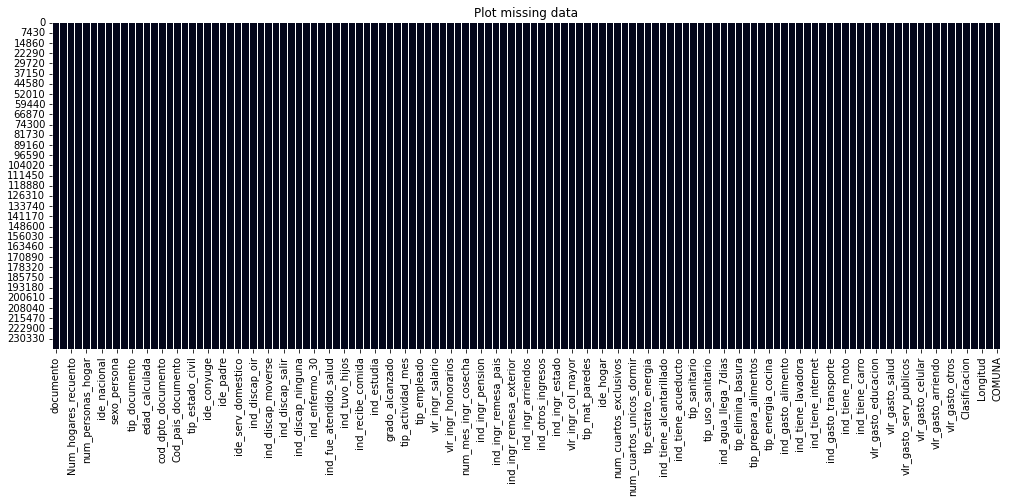

In [ ]:
# Plot missing data
plt.figure(figsize = (17, 6))
sns.heatmap(sisben_22.isnull(), cbar=False)
plt.title('Plot missing data')

In [ ]:
# Descriptive data on the people associated with the family, household and dwelling
round(sisben_22[['num_habita_vivienda', 'Num_hogares_recuento', 'num_personas_hogar']].describe(),0)

,num_habita_vivienda,Num_hogares_recuento,num_personas_hogar
count,237741.0,237741.0,237741.0
mean,3.0,1.0,4.0
std,1.0,1.0,2.0
min,1.0,1.0,1.0
25%,2.0,1.0,2.0
50%,2.0,1.0,3.0
75%,4.0,2.0,4.0
max,4.0,8.0,17.0


Text(0.5, 1.0, 'Distribution of housing, household and people per household data')

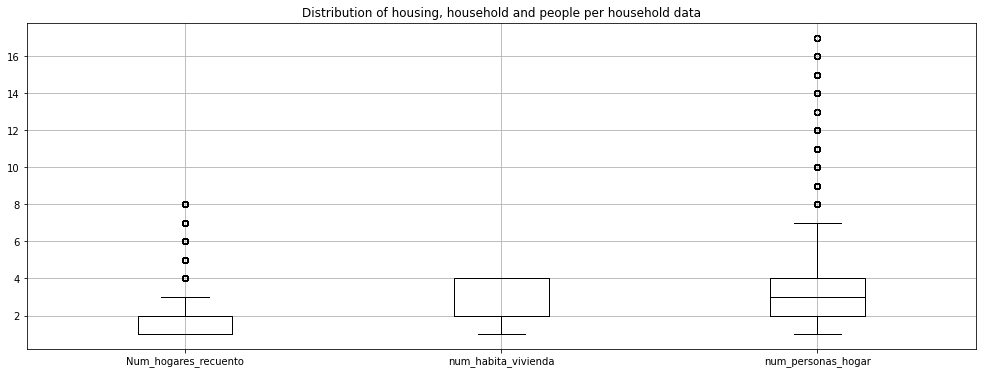

In [ ]:
plt.figure(figsize=(17, 6))
sisben_1 = sisben_2022.loc[:, ['Num_hogares_recuento','num_habita_vivienda', 'num_personas_hogar',]] 
sisben_1.boxplot(color="black")
plt.title('Distribution of housing, household and people per household data')

Text(0, 0.5, 'tot_hogares')

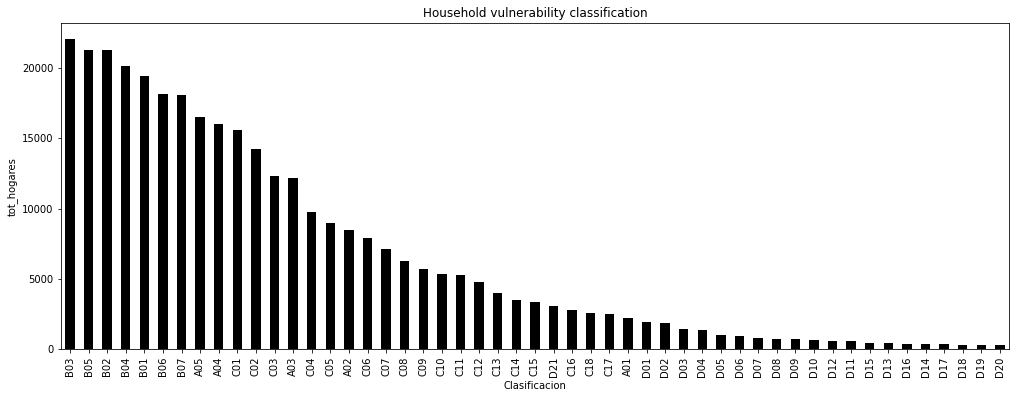

In [ ]:
vulnera3 = sisben_22.groupby(['Clasificacion']).sum()['tot_hogares'].sort_values(ascending=False)
plt.figure(figsize = (17, 6))
vulnera3.plot(kind='bar', color="black");
plt.title('Household vulnerability classification')
plt.ylabel('tot_hogares')

Text(0, 0.5, 'tot_hogares')

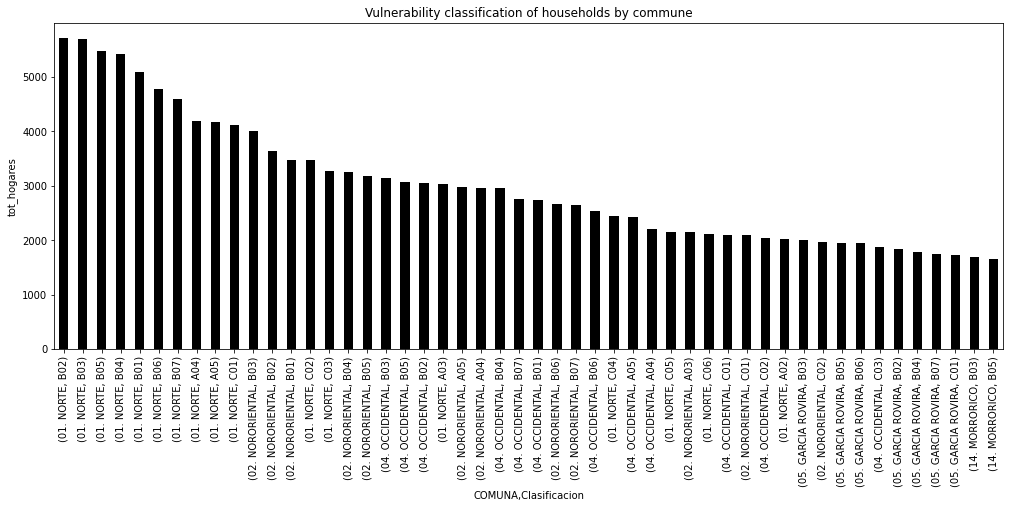

In [ ]:
# vulnerability classification of households by commune
vulnera2 = sisben_22.groupby(['COMUNA','Clasificacion']).sum()['tot_hogares'].sort_values(ascending=False).head(50)
plt.figure(figsize = (17, 6))
vulnera2.plot(kind='bar', color="black");
plt.title('Vulnerability classification of households by commune')
plt.ylabel('tot_hogares')

Text(0, 0.5, 'tot_hogares')

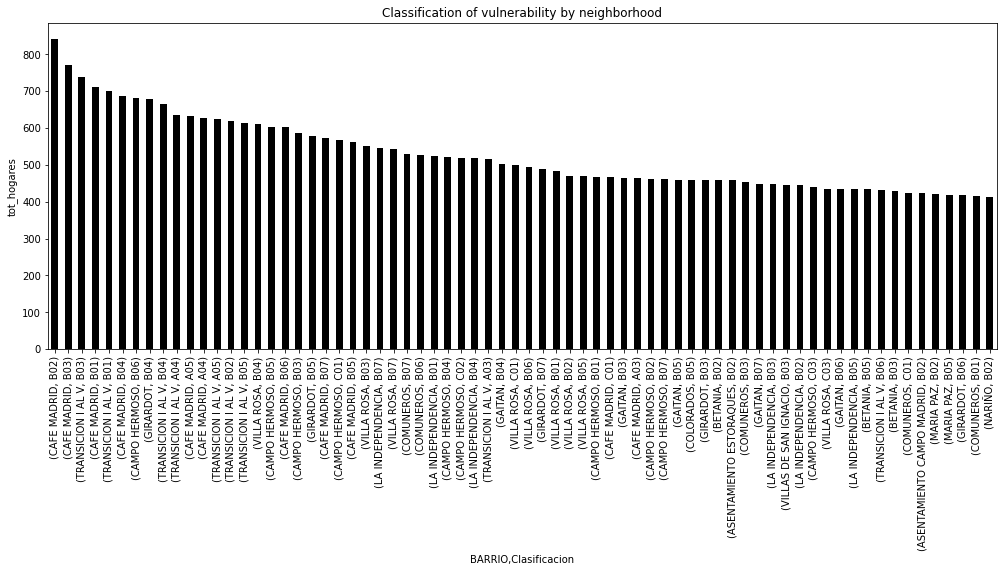

In [ ]:
vulnera1 = sisben_22.groupby(['BARRIO','Clasificacion']).sum()['tot_hogares'].sort_values(ascending=False).head(70)
plt.figure(figsize = (17, 6))
vulnera1.plot(kind='bar', color="black");
plt.title('Classification of vulnerability by neighborhood')
plt.ylabel('tot_hogares')

## **Sisben 2021**

In [ ]:
#sisben = pd.read_csv("/content/drive/MyDrive/Team 111 DS4A - Project/Data/sisben_unificado_2021_Vds4a.csv", sep=";", lineterminator='\n')
sisben = pd.read_csv("/content/sisben_unificado_2021_Vds4a.csv", sep=";", lineterminator='\n')
sisben.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,5,7,9,10,37,41,42,47,48,49,52,54,55,73,75,80,81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID_data,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,...,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia\r
0,1,sisben iv 14188777,NaN,NaN,NaN,NaN,NaN,NaN,68001093549300001017,1,...,0.0,"3,75",0.0,NaN,NaN,NaN,680010935493000010171,0.0,680010935493000010171,1056714
1,1,sisben iv 14028290,NaN,NaN,NaN,NaN,NaN,NaN,68001065548600002007,1,...,0.0,6,1.0,NaN,NaN,NaN,680010655486000020071,0.0,680010655486000020071,1043841
2,1,sisben iv 14205420,NaN,NaN,NaN,NaN,NaN,NaN,68001047548200001063,2,...,0.0,"4,5",0.0,NaN,NaN,NaN,680010475482000010632,0.0,680010475482000010632,1031856
3,1,sisben iv 14047259,NaN,NaN,NaN,NaN,NaN,NaN,68001001547500000397,1,...,0.0,3,0.0,NaN,NaN,NaN,680010015475000003971,0.0,680010015475000003971,1000217
4,1,sisben iv 14131664,NaN,NaN,NaN,NaN,NaN,NaN,68001026548300001183,2,...,0.0,3,0.0,NaN,NaN,NaN,680010265483000011832,0.0,680010265483000011832,1016672


In [ ]:
sisben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357448 entries, 0 to 357447
Data columns (total 82 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID_data                   357448 non-null  int64  
 1   origen                    357448 non-null  object 
 2   cod_mpio                  18418 non-null   float64
 3   nom_mpio                  18418 non-null   object 
 4   cod_dpto                  18418 non-null   float64
 5   nom_dpto                  18418 non-null   object 
 6   id_registro               13205 non-null   float64
 7   secuencia_reg             18418 non-null   object 
 8   ide_ficha_origen          357448 non-null  object 
 9   ide_origen                218289 non-null  object 
 10  id_hogar_s3               125696 non-null  object 
 11  tip_parentesco            339030 non-null  float64
 12  fecha_encuesta            343881 non-null  object 
 13  pri_nombre                357448 non-null  o

In [ ]:
print("Number of rows and columns:", sisben.shape,"\n")
print("Column names: ", sisben.columns.tolist())

Number of rows and columns: (357448, 82) 

Column names:  ['ID_data', 'origen', 'cod_mpio', 'nom_mpio', 'cod_dpto', 'nom_dpto', 'id_registro', 'secuencia_reg', 'ide_ficha_origen', 'ide_origen', 'id_hogar_s3', 'tip_parentesco', 'fecha_encuesta', 'pri_nombre', 'seg_nombre', 'pri_apellido', 'seg_apellido', 'tip_documento', 'num_documento_a', 'sexo_persona', 'fec_nacimiento', 'maestra_grupo', 'nivel_sisben', 'fea_pers', 'fea_hog', 'cm_benef_pers', 'cm_benef_hog', 'cm_priori_pers', 'cm_priori_hog', 'jea_pers', 'jea_hog', 'iva_fea_hog_v3', 'iva_cm_v3', 'iva_cm_hog_v3', 'iva_fea_v3', 'no_cubiertos_trans_hog', 'gen_e_per', 'gen_e_hog', 'victima_pers', 'victima_hog', 'bdua_regimen', 'tipo_afiliado', 'puntaje_sisben_3_trunc', 'edad_c', 'ind_fondo_pensiones_siv', 'tip_actividad_mes_siv', 'tip_empleado_siv', 'discapacidad', 'coord_x_auto_enc', 'coord_y_auto_enc', 'direcc', 'cod_barrio', 'nom_barrio', 'cod_vereda', 'nom_vereda', 'tel_contacto', 'tel_contacto_2', 'tel_fijo', 'ind_i_1', 'ind_i_2', 'i

In [ ]:
sisben.sample(3)

,ID_data,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,...,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia\r
251546,2,sisben iii 012020,NaN,NaN,NaN,NaN,NaN,NaN,42240,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68001422401,0.0,68001422401,2040669
339544,3,victimas,68001.0,bucaramanga,68.0,santander,NaN,0|0,0|0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan\r
188311,1,sisben iv 14197348,NaN,NaN,NaN,NaN,NaN,NaN,68001042550100003219,1,...,0.0,"1,5",0.0,NaN,NaN,NaN,680010425501000032191,0.0,680010425501000032191,1030200


In [ ]:
sisben_21 = sisben.loc[:, [     #ID
                                'num_documento_a','tip_documento',
                                # house 
                                'id_hogar_s3','fea_hog','cm_benef_hog', 'cm_benef_hog', 'victima_hog', 'hogar_final', 'hogar_corregido',
                                #datos persona
                                'tip_parentesco', 'tel_contacto', 'sexo_persona', 'fec_nacimiento', 'edad_c','gen_e_hog',
                                #datos encuesta
                                'fecha_encuesta', 'tipo_afiliado', 'puntaje_sisben_3_trunc', 'nivel_sisben',
                                #datos sociales
                                'ind_i_3','icbf_ninos_beneficiarios','icbf_madres_gestantes','icbf_ninos_venezolanos',
                                # Geolocation
                                'nom_barrio', 'cod_barrio', 'direcc','cod_vereda','nom_vereda','coord_x_auto_enc', 'coord_y_auto_enc'
                            ]
                           ]

In [ ]:
sisben_21["fec_nacimiento"] = pd.to_datetime(sisben_21["fec_nacimiento"])

In [ ]:
sisben_21.sample(3)

,num_documento_a,tip_documento,id_hogar_s3,fea_hog,cm_benef_hog,cm_benef_hog,victima_hog,hogar_final,hogar_corregido,tip_parentesco,...,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,nom_barrio,cod_barrio,direcc,cod_vereda,nom_vereda,coord_x_auto_enc,coord_y_auto_enc
62775,62776,1,NaN,1.0,NaN,NaN,NaN,680011155481000006731,680011155481000006731,1.0,...,NaN,NaN,NaN,juan xxiii,199.0,kr 8 b # 69 - 20,0.0,sin vereda,"7,09421217","-73,12084258"
80682,80683,1,NaN,NaN,NaN,NaN,NaN,680010195473000013481,680010195473000013481,1.0,...,NaN,NaN,NaN,san rafael,75.0,kr 12 # 1 - 34,0.0,sin vereda,"7,14247048","-73,13673735"
313321,313322,1,"6,80011E+11",NaN,NaN,NaN,NaN,"6,80011E+11","6,80011E+11",3.0,...,NaN,NaN,NaN,regadero norte,61.0,cl 26 40,0.0,barrio zona urbana,NaN,NaN


In [ ]:
sisben_21.isna().sum()

num_documento_a                  0
tip_documento                    0
id_hogar_s3                 231752
fea_hog                     293318
cm_benef_hog                331810
cm_benef_hog                331810
victima_hog                 297566
hogar_final                  13521
hogar_corregido              18418
tip_parentesco               18418
tel_contacto                 18418
sexo_persona                     0
fec_nacimiento                   0
edad_c                       18418
gen_e_hog                   353088
fecha_encuesta               13567
tipo_afiliado               150635
puntaje_sisben_3_trunc       18418
nivel_sisben                144114
ind_i_3                     144114
icbf_ninos_beneficiarios    336862
icbf_madres_gestantes       356363
icbf_ninos_venezolanos      357325
nom_barrio                   18418
cod_barrio                   18418
direcc                       13625
cod_vereda                   18420
nom_vereda                   18418
coord_x_auto_enc    

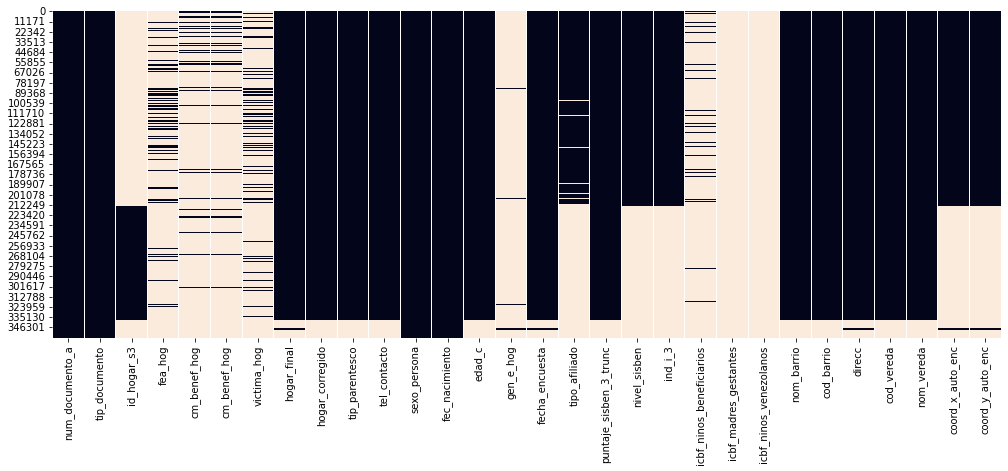

In [ ]:
plt.figure(figsize = (17, 6))
sns.heatmap(sisben_21.isnull(), cbar=False)

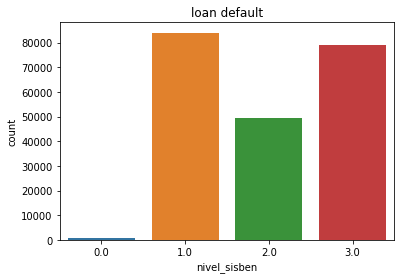

In [ ]:
sns.countplot(x='nivel_sisben', data=sisben_21)
plt.title("loan default");

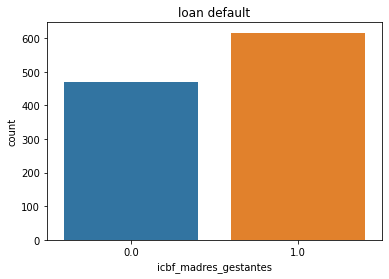

In [ ]:
sns.countplot(x='icbf_madres_gestantes', data=sisben_21)
plt.title("loan default");

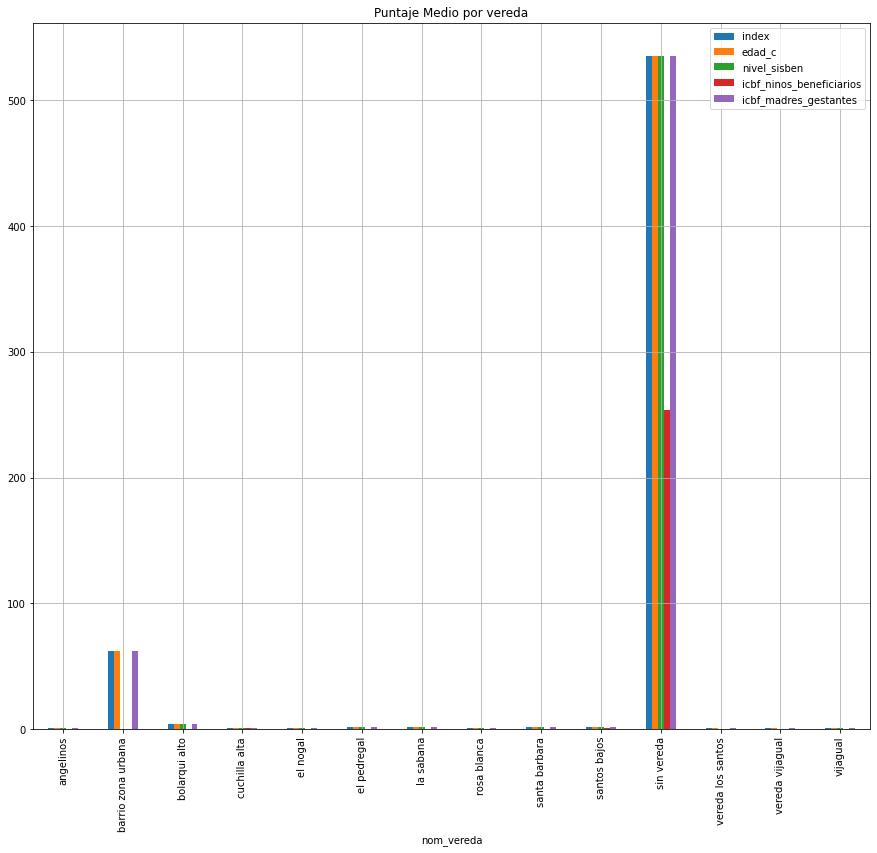

In [ ]:
y = sisben_21[ sisben_21["nom_barrio"].notna() & sisben_21["icbf_madres_gestantes"]== 1].reset_index()

y[["index","nom_vereda", "edad_c", "nivel_sisben","icbf_ninos_beneficiarios","icbf_madres_gestantes"]].groupby("nom_vereda").count().plot.bar(rot=90, 
                                                                                                       figsize=(15,13),
                                                                                                       title ="Puntaje Medio por vereda",
                                                                                                       grid =True)

The database has 600 pregnant mothers, with a mean age of 25.8 years. 535 women do not count without a village name, which indicates that they are women on the way to another place.

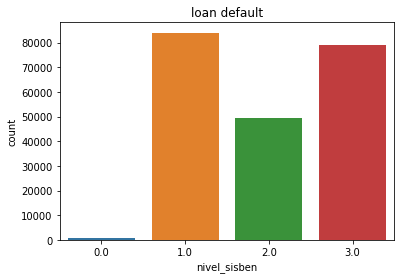

In [ ]:
sns.countplot(x='nivel_sisben', data=sisben_21)
plt.title("loan default");

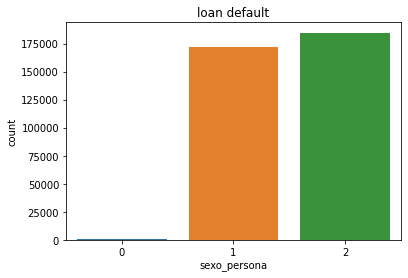

In [ ]:
sns.countplot(x='sexo_persona', data=sisben_21)
plt.title("loan default");

Most of the respondents have a sisben level of 1. In the database there are more women than men, however they are representative samples for the population

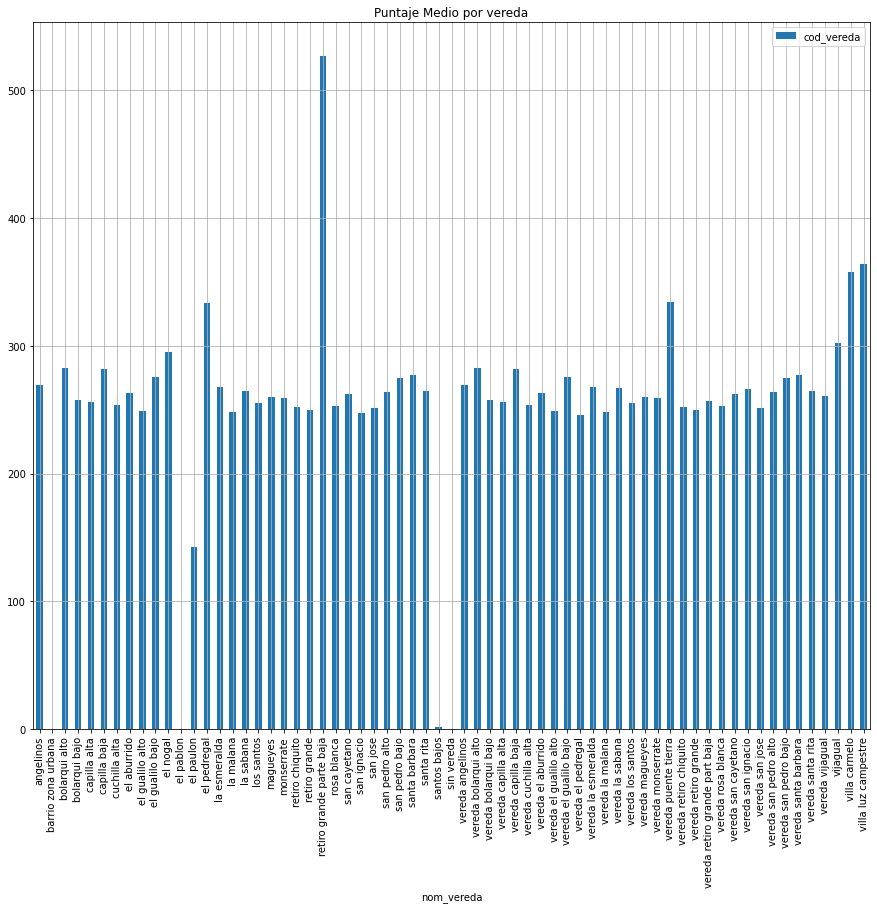

In [ ]:
sisben_21[["cod_vereda", "nom_vereda","puntaje_sisben_3_trunc"]].groupby("nom_vereda").mean().plot.bar(rot=90, 
                                                                                                       figsize=(15,13),
                                                                                                       title ="Puntaje Medio por vereda",
                                                                                                       grid =True)

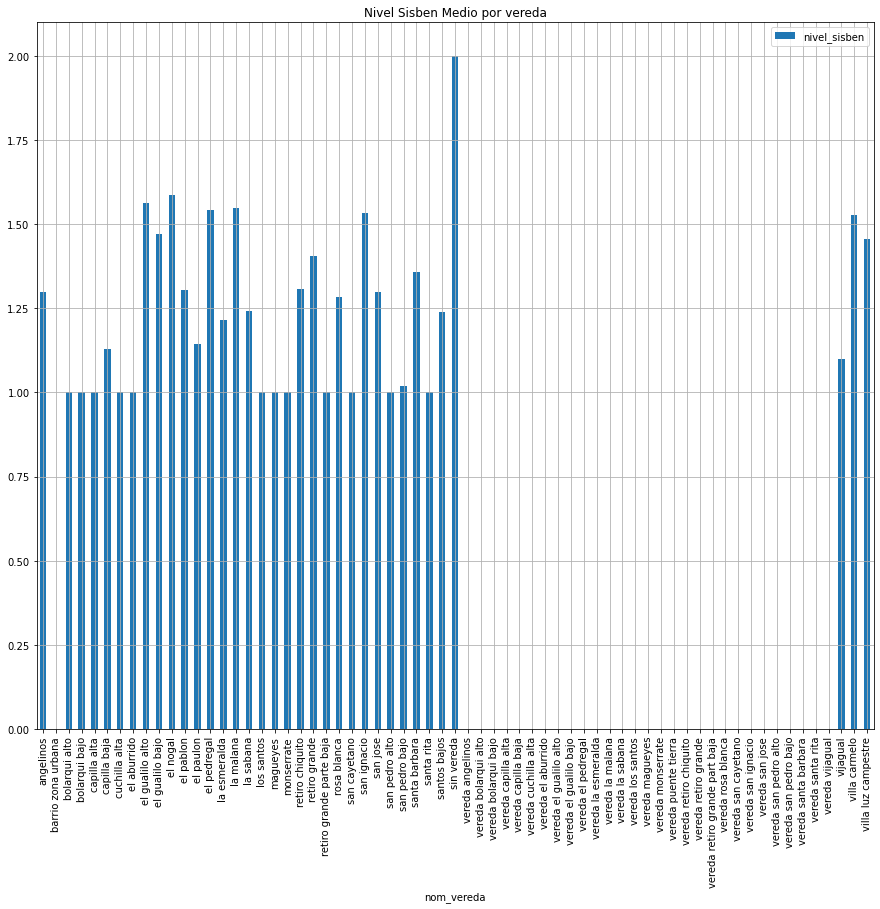

In [ ]:
sisben_21[["nom_vereda","nivel_sisben"]].groupby("nom_vereda").mean().plot.bar(rot=90, 
                                                                                                       figsize=(15,13),
                                                                                                       title ="Nivel Sisben Medio por vereda",
                                                                                                       grid =True)

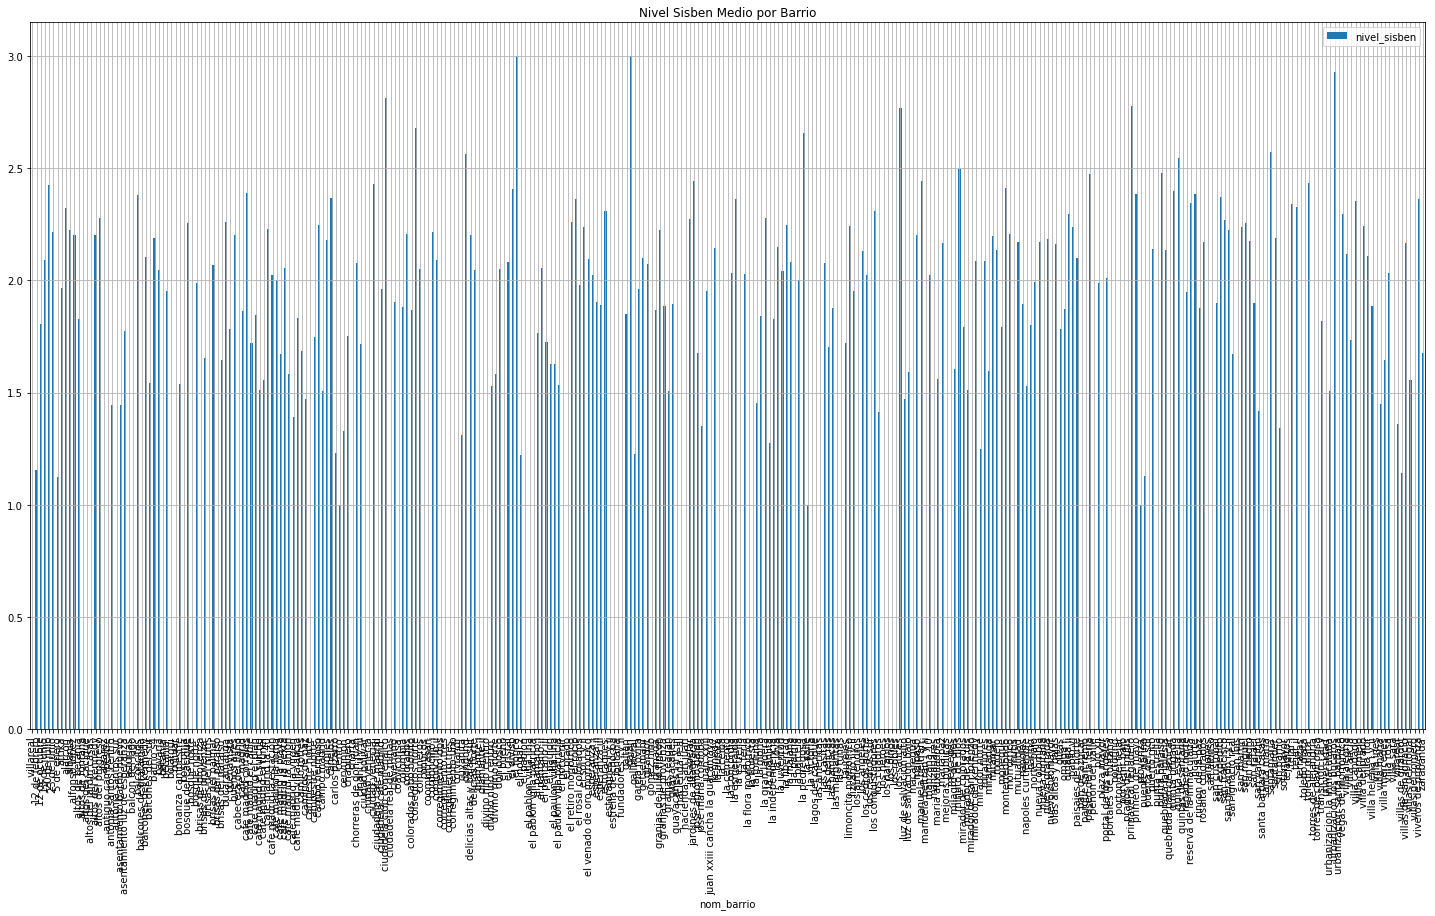

In [ ]:
sisben_21[["nom_barrio","nivel_sisben"]].groupby("nom_barrio").mean().plot.bar(rot=90, 
                                                                                       figsize=(25,13),
                                                                                       title ="Nivel Sisben Medio por Barrio",
                                                                                       grid =True)

## **DANE CNVP 2018**

This is the geoestadistic data from 2018 national population census, available on DANE web page ([CNVP2018](https://www.dane.gov.co/files/geoportal-provisional/index.html)).

In [ ]:
# Load data
vulnerabilidad = gpd.read_file('/content/drive/MyDrive/Team 111 DS4A - Project/Data/SHP_VULNRB_IPMxMZ')

In [ ]:
# Select data of the department of Santander
vulnerabilidad_santander = vulnerabilidad[vulnerabilidad['COD_DPTO'] == "68"]
print(vulnerabilidad_santander.shape)
vulnerabilidad_santander.head()

(25440, 8)


,COD_DPTO,COD_MPIO,COD_DANE,CATEGORIA,LABEL,ipm,embarazo_a,geometry
381204,68,68001,6800110000000001010102,4.0,Vulnerabilidad baja,9.2,Vulnerabilidad media-baja,"POLYGON ((-73.13233 7.15481, -73.13233 7.15469..."
381205,68,68001,6800110000000001010115,4.0,Vulnerabilidad baja,13.8,Vulnerabilidad media,"POLYGON ((-73.13330 7.15650, -73.13330 7.15650..."
381206,68,68001,6800110000000001010116,3.0,Vulnerabilidad media-alta,15.4,Vulnerabilidad media-baja,"POLYGON ((-73.13355 7.15565, -73.13362 7.15560..."
381207,68,68001,6800110000000001010117,2.0,Vulnerabilidad media-baja,13.4,Vulnerabilidad baja,"POLYGON ((-73.13275 7.15587, -73.13271 7.15581..."
381208,68,68001,6800110000000001010118,2.0,Vulnerabilidad media-baja,11.2,Vulnerabilidad media-alta,"POLYGON ((-73.13368 7.15504, -73.13373 7.15501..."


In [ ]:
# Select municipalities of the Metopolitan Area of Bucaramanga
lista_cod_municipios = ['68307', '68276', '68547', '68001']
vulnerabilidad_manzanas_area_bucaramanga = vulnerabilidad_santander[vulnerabilidad_santander['COD_MPIO'].isin(lista_cod_municipios)]
vulnerabilidad_manzanas_area_bucaramanga.shape

(11475, 8)

In [ ]:
# Adjust format of the ipm variable and filter 
vulnerabilidad_manzanas_area_bucaramanga['ipm'] = pd.to_numeric(vulnerabilidad_manzanas_area_bucaramanga['ipm'],errors='coerce')
vulnerabilidad_manzanas_area_bucaramanga = vulnerabilidad_manzanas_area_bucaramanga[vulnerabilidad_manzanas_area_bucaramanga['ipm'] != 0]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
vulnerabilidad_manzanas_area_bucaramanga.head()

,COD_DPTO,COD_MPIO,COD_DANE,CATEGORIA,LABEL,ipm,embarazo_a,geometry
381204,68,68001,6800110000000001010102,4.0,Vulnerabilidad baja,9.2,Vulnerabilidad media-baja,"POLYGON ((-73.13233 7.15481, -73.13233 7.15469..."
381205,68,68001,6800110000000001010115,4.0,Vulnerabilidad baja,13.8,Vulnerabilidad media,"POLYGON ((-73.13330 7.15650, -73.13330 7.15650..."
381206,68,68001,6800110000000001010116,3.0,Vulnerabilidad media-alta,15.4,Vulnerabilidad media-baja,"POLYGON ((-73.13355 7.15565, -73.13362 7.15560..."
381207,68,68001,6800110000000001010117,2.0,Vulnerabilidad media-baja,13.4,Vulnerabilidad baja,"POLYGON ((-73.13275 7.15587, -73.13271 7.15581..."
381208,68,68001,6800110000000001010118,2.0,Vulnerabilidad media-baja,11.2,Vulnerabilidad media-alta,"POLYGON ((-73.13368 7.15504, -73.13373 7.15501..."


Text(0.5, 1.0, 'Vulnerability per block for Bucaramanga metropolitan area - DANE CNPV2018')

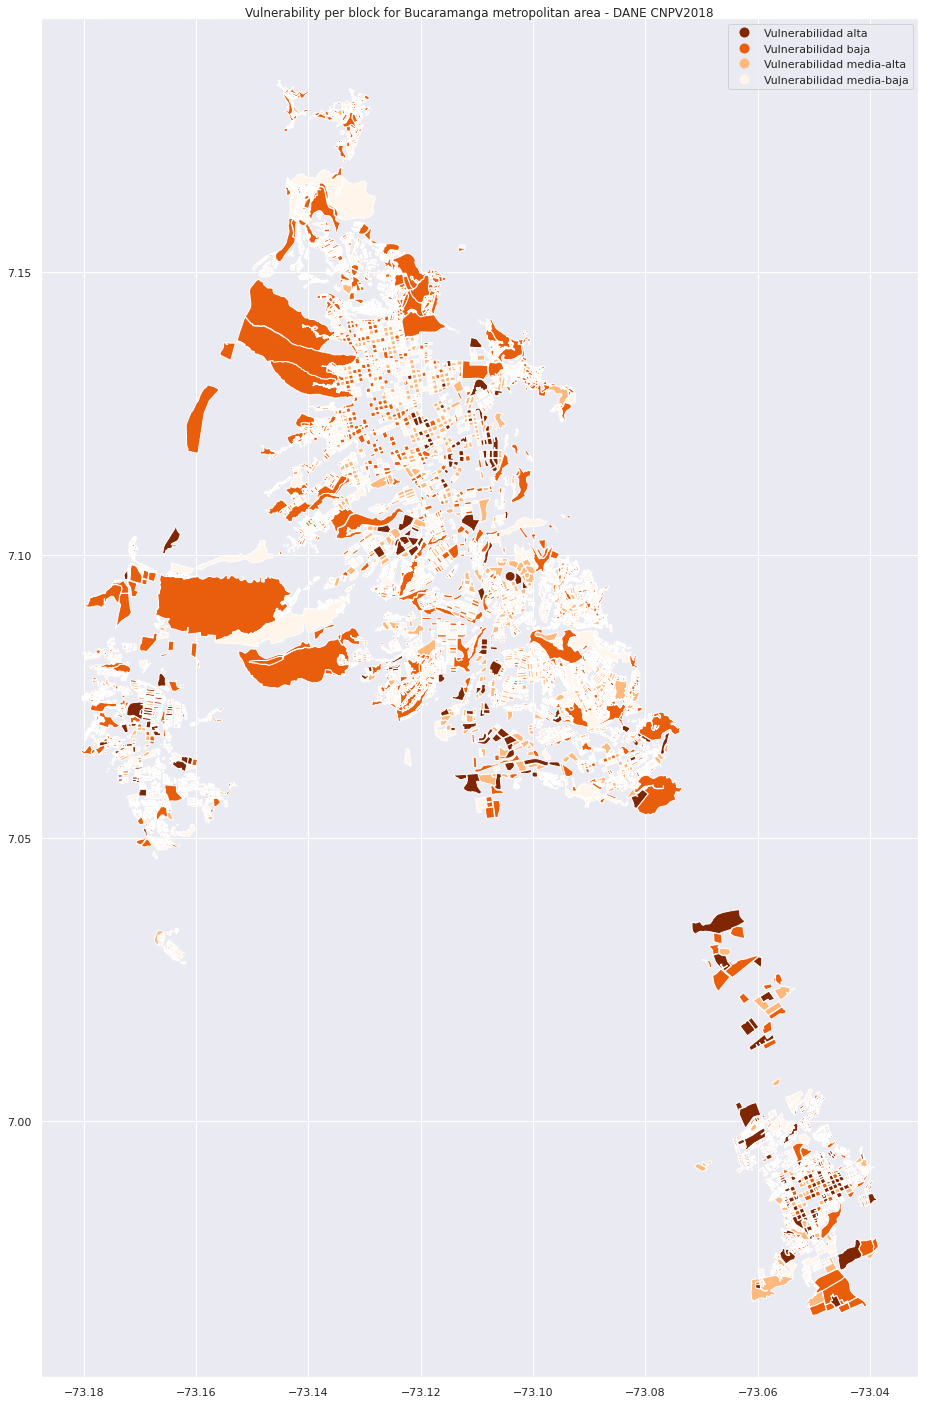

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(25, 25))
vulnerabilidad_manzanas_area_bucaramanga.plot(ax=ax, column='LABEL', legend=True, cmap='Oranges_r')
plt.title(label='Vulnerability per block for Bucaramanga metropolitan area - DANE CNPV2018', 
          fontweight=10, 
          pad='2.0')

In [ ]:
# Load vulnerability for neighborhood blocks
mgn_minicipios = gpd.read_file('/content/drive/MyDrive/Team 111 DS4A - Project/Data/SHP_MGN2018_INTGRD_MPIO', encoding='utf-8')
# Check the first rows
mgn_minicipios.head(2)

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CDPMP,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,STP3_2_NO,STP3A_RI,STP3B_TCN,STP4_1_SI,STP4_2_NO,STP9_1_USO,STP9_2_USO,STP9_3_USO,STP9_4_USO,STP9_2_1_M,...,STP32_1_SE,STP32_2_SE,STP34_1_ED,STP34_2_ED,STP34_3_ED,STP34_4_ED,STP34_5_ED,STP34_6_ED,STP34_7_ED,STP34_8_ED,STP34_9_ED,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,geometry
0,18,001,FLORENCIA,18001,2018,2.547638e+09,1.749139,-75.558239,71877.0,32.0,71845.0,32.0,0.0,0.0,71877.0,61176.0,2178.0,8436.0,87.0,39.0,...,77620.0,79169.0,25503.0,30249.0,29951.0,23602.0,17235.0,14349.0,8969.0,4687.0,2244.0,48848.0,59610.0,21898.0,4592.0,5892.0,3799.0,2.942508,0.206928,"POLYGON ((-75.42074 2.19413, -75.42042 2.19412..."
1,18,029,ALBANIA,18029,2018,4.141221e+08,1.227865,-75.882327,2825.0,24.0,2801.0,24.0,0.0,0.0,2825.0,1826.0,49.0,948.0,2.0,3.0,...,2323.0,2191.0,725.0,1016.0,717.0,568.0,536.0,445.0,253.0,162.0,92.0,1940.0,1712.0,231.0,41.0,215.0,46.0,1.112829,0.033618,"POLYGON ((-75.89506 1.36570, -75.89506 1.36570..."


In [ ]:
# Select the department of Bucaramanga
mgn_minicipios_santander = mgn_minicipios[mgn_minicipios['DPTO_CCDGO'] == "68"]
mgn_minicipios_santander.shape

(87, 91)

In [ ]:
# Select the municipalities of the Metropolitan Area of Bucaramanga
lista_municipios = ['BUCARAMANGA', 'GIRÓN', 'FLORIDABLANCA', 'PIEDECUESTA']
mgn_area_bucaramanga = mgn_minicipios[mgn_minicipios['MPIO_CNMBR'].isin(lista_municipios)]
mgn_area_bucaramanga

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CDPMP,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,STP3_2_NO,STP3A_RI,STP3B_TCN,STP4_1_SI,STP4_2_NO,STP9_1_USO,STP9_2_USO,STP9_3_USO,STP9_4_USO,STP9_2_1_M,...,STP32_1_SE,STP32_2_SE,STP34_1_ED,STP34_2_ED,STP34_3_ED,STP34_4_ED,STP34_5_ED,STP34_6_ED,STP34_7_ED,STP34_8_ED,STP34_9_ED,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,geometry
1056,68,307,GIRÓN,68307,2018,4.930299e+08,7.036680,-73.248725,57588.0,0.0,57588.0,0.0,0.0,871.0,56717.0,49234.0,1581.0,6761.0,12.0,75.0,...,73985.0,76625.0,22443.0,23746.0,27619.0,23824.0,19520.0,16114.0,9837.0,5052.0,2455.0,44664.0,63196.0,25298.0,1361.0,3745.0,1325.0,2.010667,0.040342,"POLYGON ((-73.15647 7.21224, -73.15615 7.21219..."
1057,68,276,FLORIDABLANCA,68276,2018,1.003277e+08,7.079705,-73.067993,103437.0,0.0,103437.0,0.0,0.0,1879.0,101558.0,92702.0,2226.0,8467.0,42.0,158.0,...,129711.0,145398.0,35932.0,39999.0,48533.0,41872.0,36935.0,33034.0,20968.0,11952.0,5884.0,66796.0,106022.0,65886.0,10733.0,5028.0,3352.0,0.529697,0.008209,"POLYGON ((-73.03185 7.14775, -73.03138 7.14750..."
1060,68,547,PIEDECUESTA,68547,2018,4.845723e+08,6.962456,-73.005172,68806.0,0.0,68806.0,0.0,0.0,103.0,68703.0,56578.0,1690.0,10498.0,40.0,111.0,...,76461.0,80964.0,22635.0,25095.0,27687.0,25152.0,20355.0,17687.0,10707.0,5356.0,2751.0,45509.0,62967.0,29181.0,3252.0,3890.0,1665.0,1.248418,0.039638,"POLYGON ((-72.97950 7.11077, -72.97851 7.11074..."
1061,68,001,BUCARAMANGA,68001,2018,1.529157e+08,7.155834,-73.111570,214916.0,0.0,214916.0,0.0,0.0,4034.0,210882.0,184352.0,5090.0,25359.0,115.0,484.0,...,250975.0,277880.0,66732.0,75125.0,96503.0,80431.0,66456.0,63975.0,42448.0,23655.0,13530.0,128911.0,195445.0,128045.0,23118.0,11694.0,8730.0,0.693489,0.012514,"POLYGON ((-73.08418 7.23064, -73.08425 7.23014..."


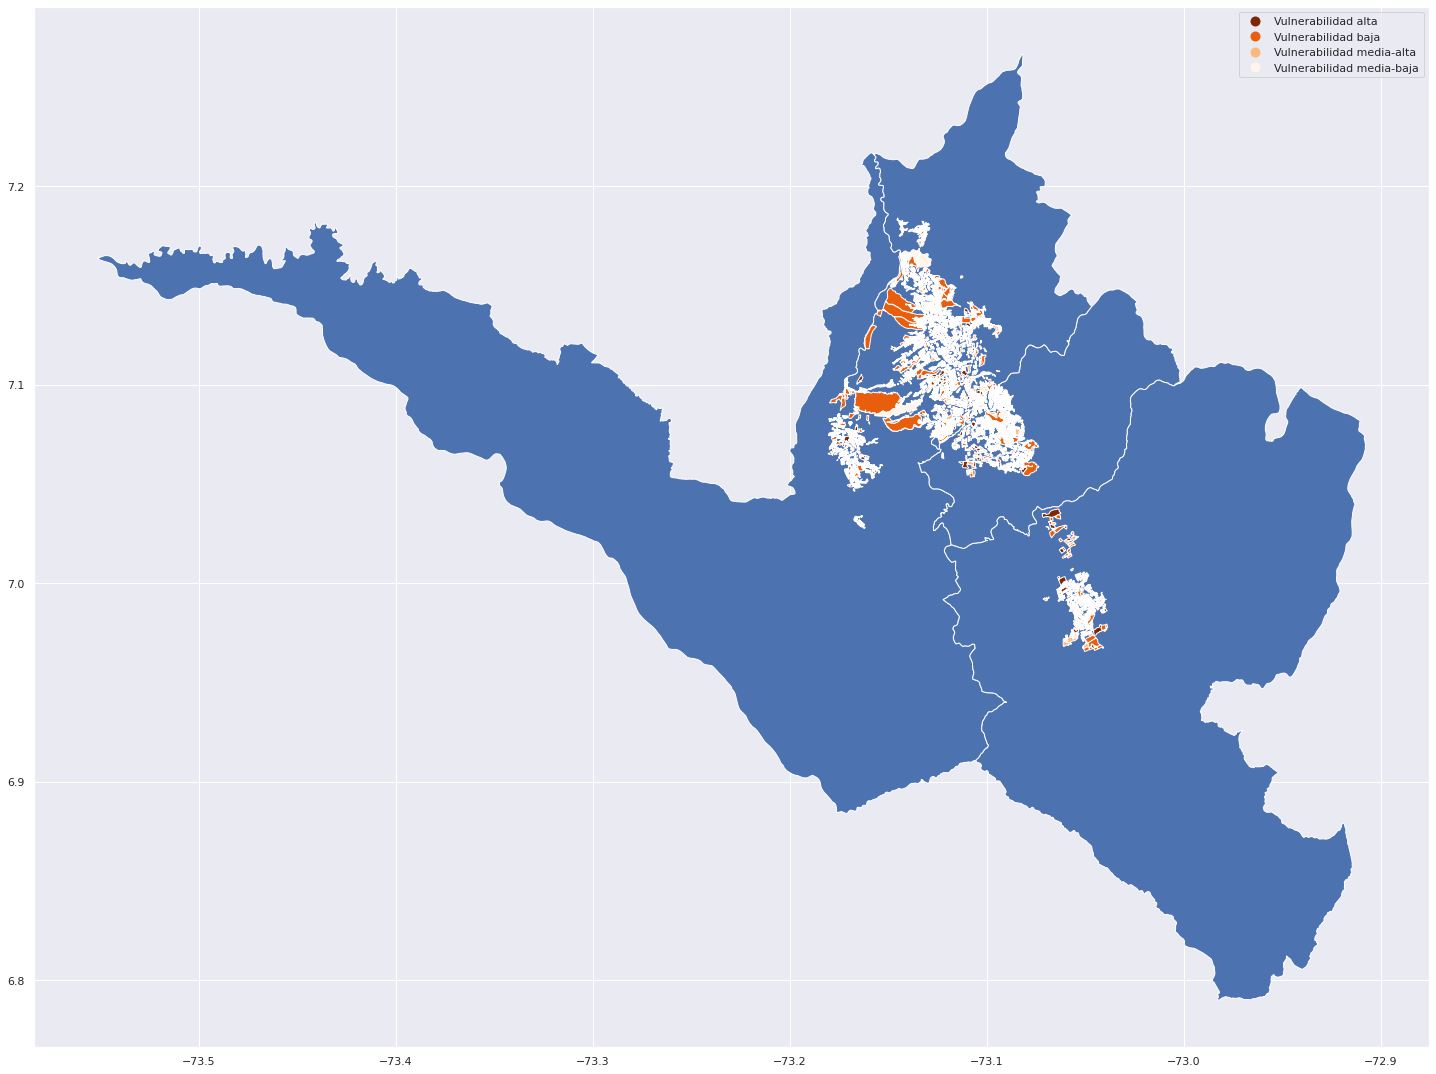

In [ ]:
# Plot the municipalities of interes with the detail of the neghborhoods blocks with vulnerability
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
mgn_area_bucaramanga.plot(ax=ax)
vulnerabilidad_manzanas_area_bucaramanga.plot(ax=ax, column='LABEL', legend=True, cmap='Oranges_r')

## **Crimes Bucaramanga**

In this dataset we have information related with crimes commited in the city of Bucaramanga between january 2010 - december 2021. 

In [ ]:
# Load data
crimes_bucaramanga = pd.read_csv('/content/drive/MyDrive/Team 111 DS4A - Project/Data/Delitos_en_Bucaramanga_enero_2010_a_diciembre_de_2021.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Check first rows
crimes_bucaramanga.head(3)

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,1,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,7.170557,-73.135108,URBANA,14. Morrorico,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,30,05. Adultez,UNION LIBRE,MASCULINO,A PIE,A PIE
1,2,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120645,-73.12605,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,21,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
2,3,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120645,-73.12605,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,23,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE


We have the follow variables:

*   **ORDEN:** Numeric consecutive
*   **ARMAS_MEDIO:** Weapon used in the crime
*   **BARRIOS_HECHO:** Neighborhood where the crime was commited
*   **LATITUD:** Latitude
*   **LONGITUD:** Longitude
*   **ZONA:** Type of the zone. Urban, rural, etc.
*   **NOM_COMUNA:** Commune where the crime was commited
*   **ANO:** Year when the crime was commited
*   **MES:** Month when the crime was commited
*   **DIA:** Day when the crime was commited
*   **DIA_SEMANA:** Dayweek when the crime was commited
*   **DESCRIPCION_CONDUCTA:** Description of the crime according to the law
*   **CONDUCTA:** Type of crime
*   **CLASIFICACIONES DELITO:** Sub classification of the type of crime
*   **EDAD:** Age of the person affected in the crime
*   **CURSO_DE_VIDA:** Classification of the age. Adults, young adults, childs, etc.
*   **ESTADO_CIVIL_PERSONA:** Civil status of the person affected in the crime
*   **GENERO:** Gender of the person affected in the crime
*   **MOVIL_AGRESOR:** Transport of the guilty person in the crime
*   **MOVIL_VICTIMA:** Transport of the affected person in the crime



In [ ]:
# Size of our dataset
print("This dataset has " + str(crimes_bucaramanga.shape[0]) + ' rows and ' + str(crimes_bucaramanga.shape[1]) + ' columns')

This dataset has 135076 rows and 20 columns


In [ ]:
# Check an initial info of the variables
crimes_bucaramanga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135076 entries, 0 to 135075
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ORDEN                   135076 non-null  int64 
 1   ARMAS_MEDIOS            135076 non-null  object
 2   BARRIOS_HECHO           135076 non-null  object
 3   LATITUD                 128713 non-null  object
 4   LONGITUD                128713 non-null  object
 5   ZONA                    135076 non-null  object
 6   NOM_COMUNA              135076 non-null  object
 7   ANO                     135076 non-null  int64 
 8   MES                     135076 non-null  object
 9   DIA                     135076 non-null  int64 
 10  DIA_SEMANA              135076 non-null  object
 11  DESCRIPCION_CONDUCTA    135076 non-null  object
 12  CONDUCTA                135076 non-null  object
 13  CLASIFICACIONES DELITO  135076 non-null  object
 14  EDAD                    135076 non-n

In total, there are 135.076 rows. Only LATITUD and LONGITUD have null values, 6.363 in both variables. The most of them have object type, which don't apply to LATITUD, LONGITUD and EDAD, so, we will have to modify these data types to make appropiate analysis. 

### **Explore features**

#### **¿What is the evolution of crimes during the time?**

Text(0.5, 1.0, 'Number of crimes over years')

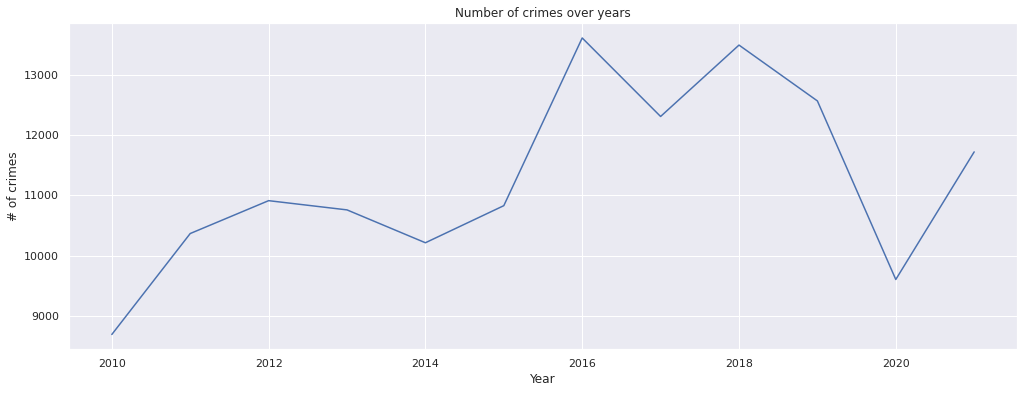

In [ ]:
# Evolution throughout years
crimes_year = crimes_bucaramanga.groupby('ANO')['ORDEN'].count().reset_index()
# Create plot
plt.figure(figsize = (17, 6))
sns.lineplot(x = 'ANO', y = 'ORDEN', data = crimes_year)
plt.xlabel('Year')
plt.ylabel('# of crimes')
plt.title('Number of crimes over years')

We observe a positive tendency over the years. On 2010 the crimes were under 9.000, while in 2019 (before pandemic for covid) the crimes were between 12.000 and 13.000. There was an atypical data in 2020, due to the confinement for the covid. 

This reflects the safety problems of the city of Bucaramanga.


#### **¿What are the monsth with higher criminality?**

Text(0.5, 1.0, 'Number of crimes by month')

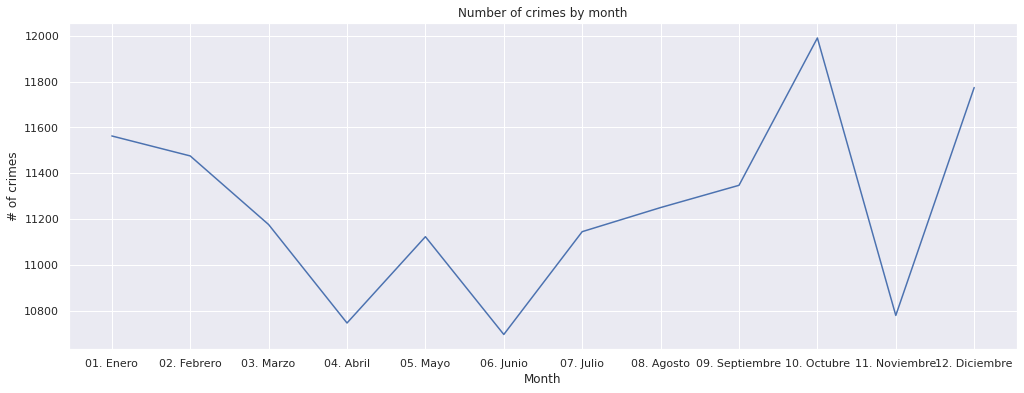

In [ ]:
# Evolution throughout years
crimes_month = crimes_bucaramanga.groupby('MES')['ORDEN'].count().reset_index()
# Create plot
plt.figure(figsize = (17, 6))
sns.lineplot(x = 'MES', y = 'ORDEN', data = crimes_month)
plt.xlabel('Month')
plt.ylabel('# of crimes')
plt.title('Number of crimes by month')

There are two months with higher criminality in Bucaramanga, October and December. A hypotehsis to this behaviour could be the special dates like Halloween, Christmas and New Year.

#### **¿What are the days with higher crimes?**

Text(0.5, 1.0, 'Crimes per day')

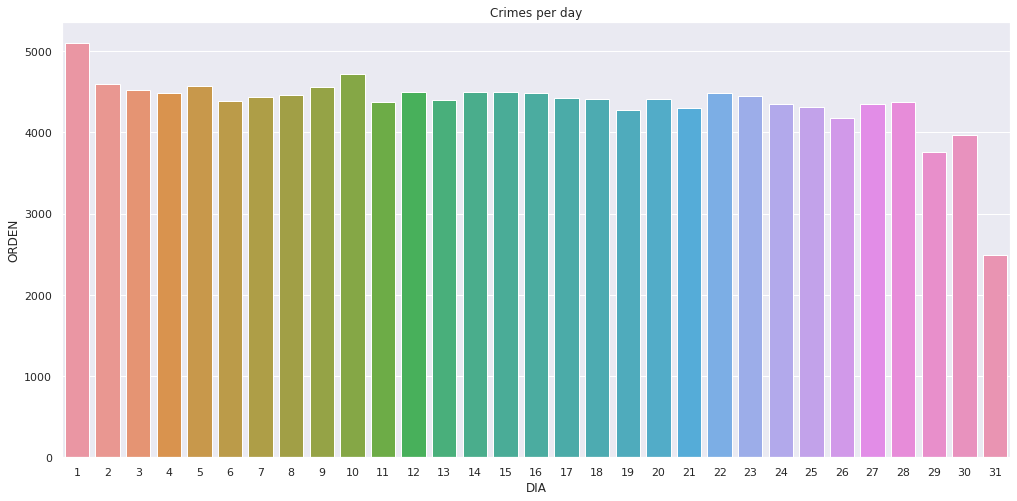

In [ ]:
# Crimes by type over the years
crimes_type_day = crimes_bucaramanga.groupby('DIA')['ORDEN'].count().reset_index().sort_values('DIA', ascending = False)
# Create a plot
plt.figure(figsize = (17,8))
sns.barplot(x = 'DIA', y = 'ORDEN', data = crimes_type_day)
plt.title('Crimes per day of the month')

The graph above shows that there is no a big difference thorughout the days. In the historical data, the first day of the month is the day with higher criminality, and the day number 31 (for the months which apply) is the 'safety' day.

Text(0.5, 1.0, 'Crimes per weekday')

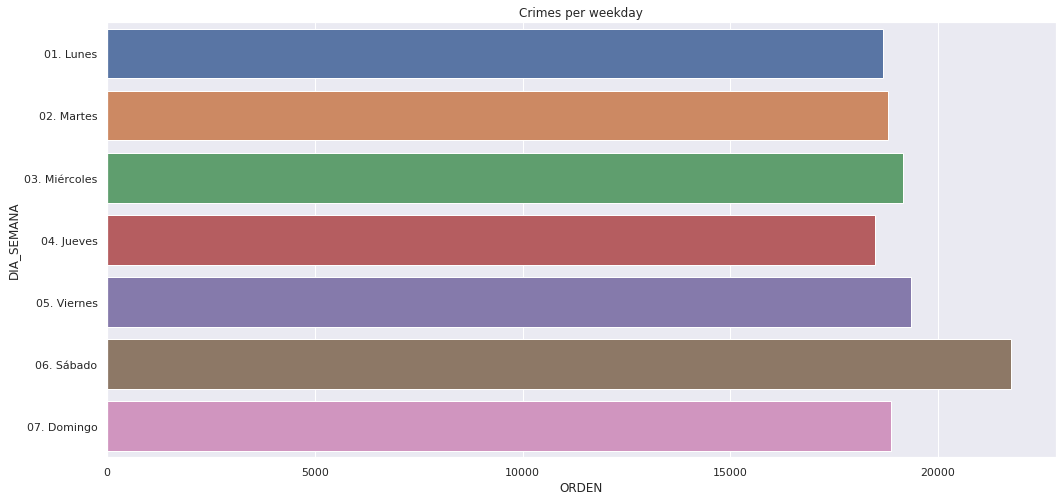

In [ ]:
# Crimes by type over the years
crimes_type_weekday = crimes_bucaramanga.groupby('DIA_SEMANA')['ORDEN'].count().reset_index().sort_values('DIA_SEMANA', ascending = True)
# Create a plot
plt.figure(figsize = (17,8))
sns.barplot(y = 'DIA_SEMANA', x = 'ORDEN', data = crimes_type_weekday)
plt.title('Crimes per weekday')

#### **¿What are the main crimes?**

In [ ]:
# Crimes by type
crimes_type = crimes_bucaramanga.groupby('CONDUCTA')['ORDEN'].count().reset_index().sort_values('ORDEN', ascending = False)
# Create % of participation and accummulated participation
crimes_type['% Participation'] = crimes_type['ORDEN'] / crimes_type['ORDEN'].sum() * 100
crimes_type['% Participation Accummulated'] = crimes_type['% Participation'].cumsum()
# Show total of crimes and top ten with participation
print('There are ' + str(crimes_type['CONDUCTA'].nunique()) + ' different type of crimes')
top10_crimes = crimes_type.head(10)
top10_crimes

There are 41 different type of crimes


,CONDUCTA,ORDEN,% Participation,% Participation Accummulated
24,HURTO A PERSONAS,48452,35.870177,35.870177
32,LESIONES PERSONALES,24450,18.100921,53.971098
31,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),21130,15.643045,69.614143
40,VIOLENCIA INTRAFAMILIAR,16519,12.229412,81.843555
21,HURTO A ENTIDADES COMERCIALES,8937,6.616275,88.459830
26,HURTO A RESIDENCIAS,4752,3.518019,91.977850
23,HURTO A MOTOCICLETAS,3708,2.745121,94.722971
9,ACTOS SEXUALES CON MENOR DE 14 AÑOS,1529,1.131955,95.854926
17,HOMICIDIO,1365,1.010542,96.865468
0,ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS,805,0.595961,97.461429


The previous information shows that of 41 different type of crimes, the top 5 represents almost the 90% of the events, and the top 10 is over 97%. There is a clearly concentration of the problematics that are affecting the population of Bucaramanga.

It is important to highlight the 8th and 10th type of crimes, because these are specific crimes against the childhoold.



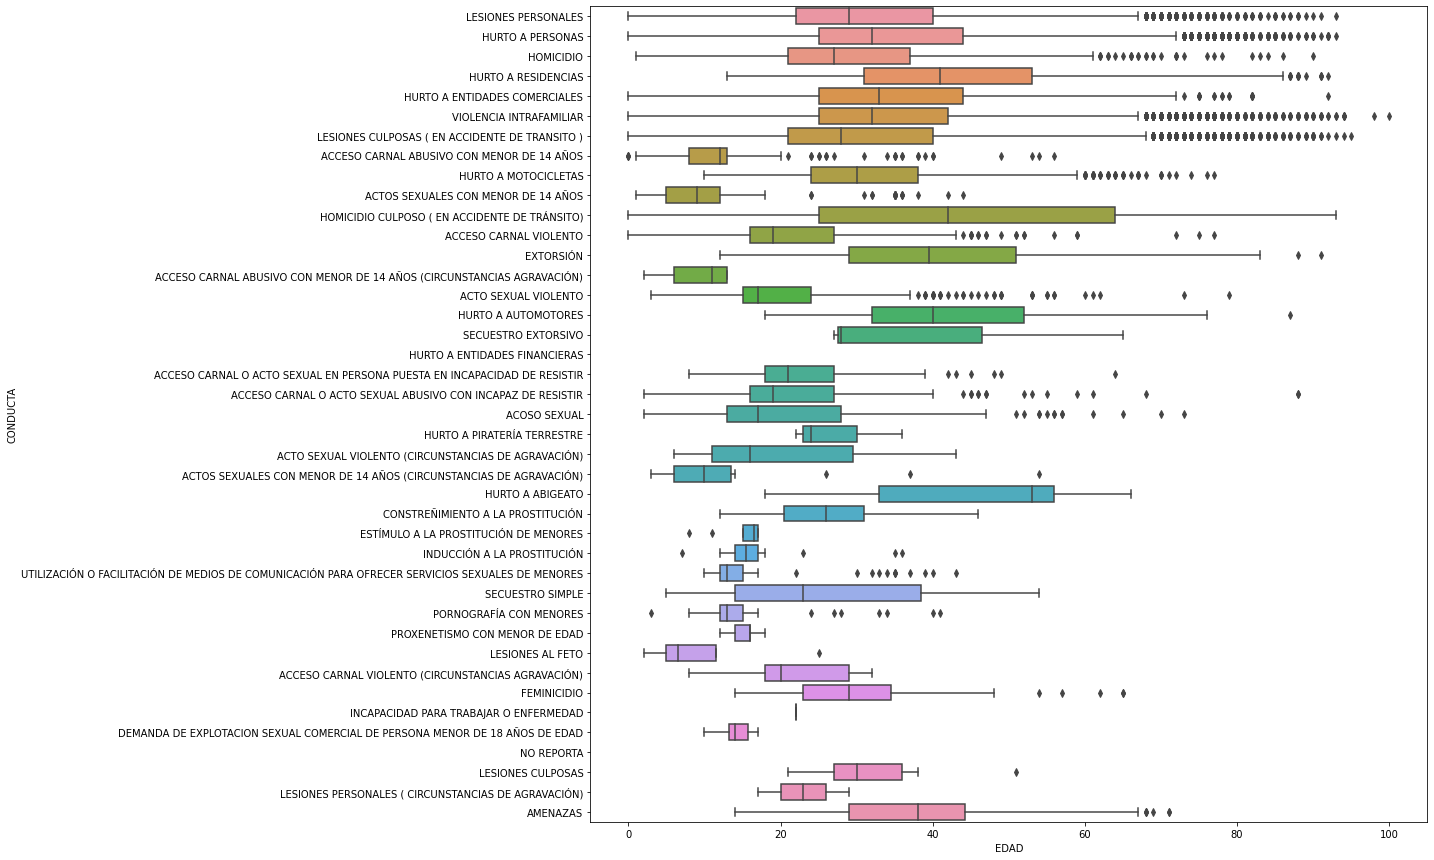

In [ ]:
# Age distribution per type of crime
crimes_bucaramanga['EDAD'] = crimes_bucaramanga['EDAD'].str.replace('NO REPORTA', '')
crimes_bucaramanga['EDAD'] = pd.to_numeric(crimes_bucaramanga['EDAD']).astype(np.float64)
plt.figure(figsize = (15, 15))
sns.boxplot(y = 'CONDUCTA', x = 'EDAD', data = crimes_bucaramanga, orient = 'h')
plt.show()

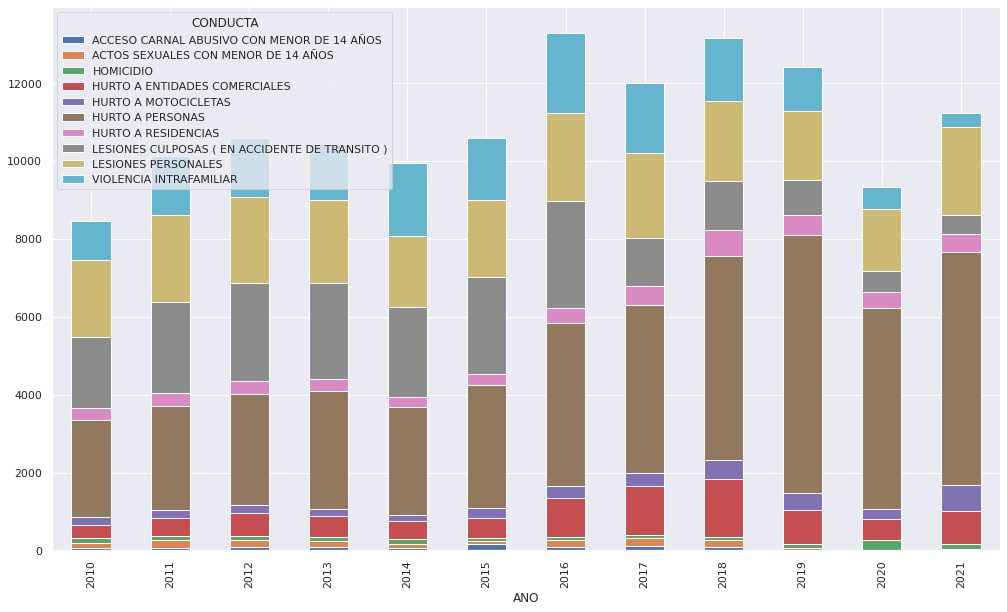

In [ ]:
# Crimes by type over the years
crimes_type_year = crimes_bucaramanga[crimes_bucaramanga['CONDUCTA'].isin(top10_crimes['CONDUCTA'])]
crimes_type_year = crimes_type_year.groupby(['CONDUCTA', 'ANO'])['ORDEN'].count().reset_index().sort_values(['ORDEN', 'ANO'], ascending = (False, True))
# Adjust structure to create a plot
crimes_type_year = crimes_type_year.pivot_table(index = 'ANO', columns = 'CONDUCTA', values = 'ORDEN').reset_index().set_index('ANO')
# Create a plot
crimes_type_year.plot(kind = 'bar', stacked = True, figsize = (17,10))




#### **¿Who are the affected population?**

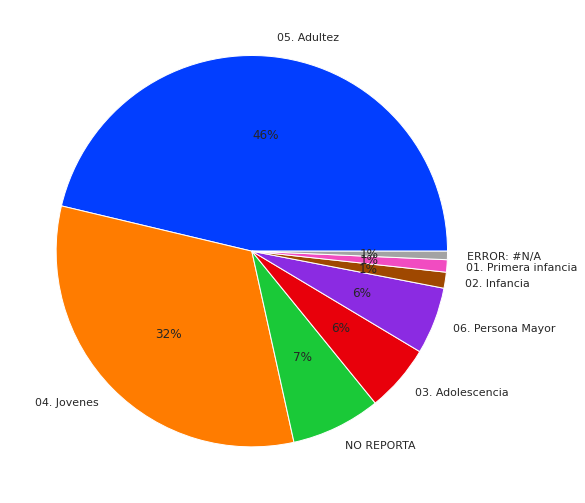

In [ ]:
# Calculate crimes for each life course
crimes_life_course = crimes_bucaramanga.groupby('CURSO_DE_VIDA')['ORDEN'].count().reset_index().sort_values('ORDEN', ascending = False)
# Create plot
palette_color = sns.color_palette('bright')
plt.figure(figsize = (20,9))
plt.pie(crimes_life_course['ORDEN'], labels = crimes_life_course['CURSO_DE_VIDA'], colors = palette_color, autopct = '%.0f%%')
plt.show()

The adults (46%) and young adults (32%) are the most affected population. The groups represents the 78% of the affected population.

Around 8% of the information has invalid data ("NO REPORTA" and "ERROR: #N/A"). Then we have to evaluate the appropiate procedure to deal with this invalid data. 

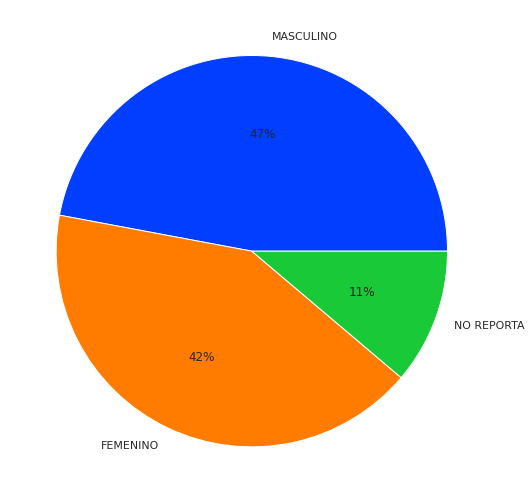

In [ ]:
# Calculate crimes by gender
crimes_gender = crimes_bucaramanga.groupby('GENERO')['ORDEN'].count().reset_index().sort_values('ORDEN', ascending = False)
# Create plot
palette_color = sns.color_palette('bright')
plt.figure(figsize = (20,9))
plt.pie(crimes_gender['ORDEN'], labels = crimes_gender['GENERO'], colors = palette_color, autopct = '%.0f%%')
plt.show()

We have a 11% of the information without data of the gender. This would be an incovenient to identify if those people belongs to a vulnerable population

#### **¿Is there difference in the type of crimes for each neigborhood?**

In [ ]:
# Crimes by type
crimes_neighborhood = crimes_bucaramanga.groupby('BARRIOS_HECHO')['ORDEN'].count().reset_index().sort_values('ORDEN', ascending = False)
# Create % of participation and accummulated participation
crimes_neighborhood['% Participation'] = crimes_neighborhood['ORDEN'] / crimes_neighborhood['ORDEN'].sum() * 100
crimes_neighborhood['% Participation Accummulated'] = crimes_neighborhood['% Participation'].cumsum()
# Show total of crimes and top ten with participation
print('There are ' + str(crimes_neighborhood['BARRIOS_HECHO'].nunique()) + ' neighborhoods')
top_crimes_neighborhood = crimes_neighborhood[crimes_neighborhood['% Participation Accummulated'] <= 90]
top_crimes_neighborhood

There are 494 neighborhoods


,BARRIOS_HECHO,ORDEN,% Participation,% Participation Accummulated
88,CENTRO,11183,8.279043,8.279043
328,SAN FRANCISCO,5944,4.400486,12.679529
64,CABECERA DEL LLANO,5794,4.289437,16.968966
195,LA CONCORDIA,5078,3.759365,20.728331
326,SAN ALONSO,3441,2.547455,23.275785
...,...,...,...,...
76,CAMPO MADRID,223,0.165092,89.249015
127,EL PABLON,220,0.162871,89.411887
278,NORTE BAJO,219,0.162131,89.574018
94,CIUDAD VENECIA,219,0.162131,89.736149


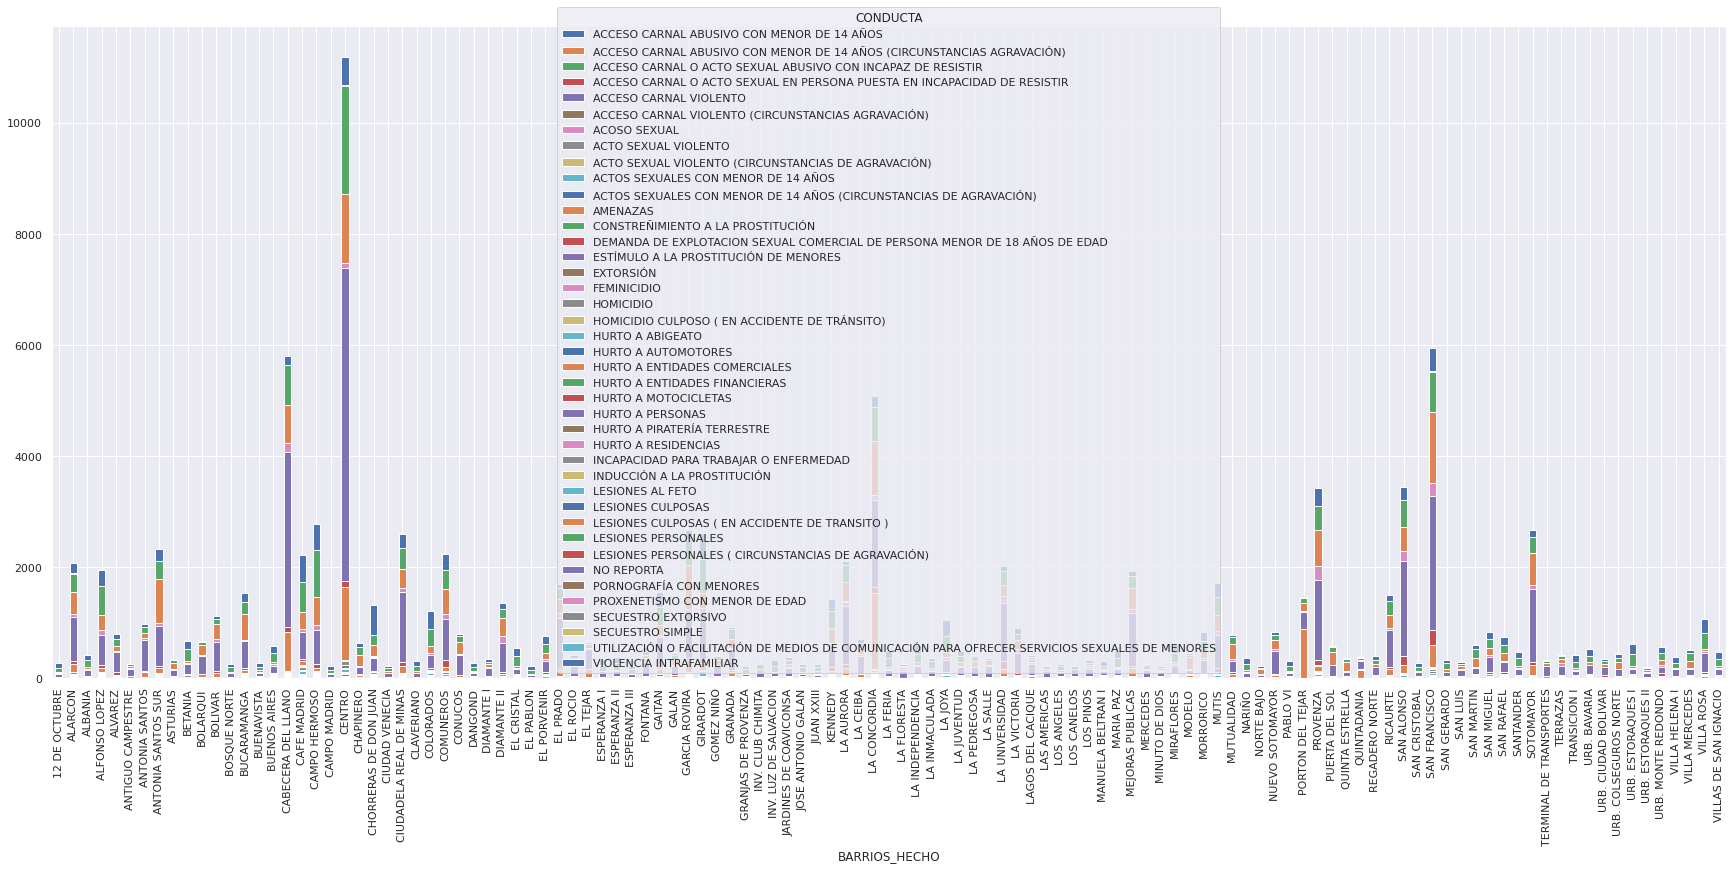

In [ ]:
# Calculate the crimes for each combination of neigborhood and type
crimes_neighborhood_type = crimes_bucaramanga.groupby(['BARRIOS_HECHO', 'CONDUCTA'])['ORDEN'].count().reset_index().sort_values('ORDEN', ascending = False)
# Adjust structure to create a plot
crimes_neighborhood_type = crimes_neighborhood_type[crimes_neighborhood_type['BARRIOS_HECHO'].isin(top_crimes_neighborhood['BARRIOS_HECHO'])]
crimes_neighborhood_type = crimes_neighborhood_type.pivot_table(index = 'BARRIOS_HECHO', columns = 'CONDUCTA', values = 'ORDEN').reset_index().set_index('BARRIOS_HECHO')
# Create a plot
crimes_neighborhood_type.plot(kind = 'bar', stacked = True, figsize = (30,12))


## **Medidas correctivas**

Is a data that contain info about penalties fees en Bucaramanga between 2017 and 2022.

Name|Description|
---|---|
DTO|Department where the penalty fee was recorded according to the police.
LUGAR|Place where the penalty fee was recorded according to the police.
UNIDAD_LABORA_POL|Unit where the penalty fee was recorded according to the police.
FECHA_HECHOS|Date on which the penalty fee occurred according to the police.
HORA_HECHOS|Time at which the penalty fee occurred according to the police.
DIA_HECHOS|Day on which the penalty fee occurred according to the police.
FECHA_CREACION|Date on which the penalty fee was recorded in the database according to the police.
LOCALIDAD|Commune in which the penalty fee was recorded according to the police.
BARRIO_HECHOS|Neighborhood in which the penalty fee was recorded according to the police.
SITIO|Place or situ in which the penalty fee was recorded according to the police.
ARTICULO|Article OF the penalty fee According to the Police.
COMPORTAMIENTO|penalty fee behavior numeral according to the police.
APLICA_MEDIDA|Relationship between the application or not of a measure to the penalty fee imposed by the Police.
MEDIDA|Measure imposed on penalty fee according to the police.
ESTADO_MEDIDA|Current status of the penalty fee measurement according to the police.
EDAD|Infringer age according to the police.
NACIONALIDAD|Nationality of the offender according to the police.
EXPEDIENTE|File under which the penalty fee is recorded according to the police.
ESTADO_COMPARENDO|Current status of comparison for the penalty fee according to the Police.
CURSO_VIDA|Classification by rank of ages of the offenders.
CURSO VIDA ORDEN|Order of the classification of ages.
CAPITULO|Chapter to which the penalty fee belongs according to the police.
DESCRIPCIÓN_CAPÍTULO|Description of the chapter to which the penalty fee belongs only.
NÚMERO_COMPORTAMIENTO|Behavior number only.
DESCRIPCIÓN_COMPORTAMIENTO|Description of the behavior to which the penalty fee belongs only.
RANGO_HORARIO|Classification by range of hours in which the penalty fee occurs.
RANGO_HORARIO_ORDEN|Schedule range order
AÑO_NUM|Year in which the penalty fee occurs according to the police.
MES_NUM|Month in which the penalty fee occurs according to the police.
DIA_NUM|Day in which the penalty fee occurs according to the police.
CANTIDAD_UNICA|Representative amount of those involved.
ID|Numerical consecutive.

In [ ]:
# Load data
df_md = pd.read_csv('/content/drive/MyDrive/Team 111 DS4A - Project/Data/medidas_correctivas.csv')

In [ ]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197460 entries, 0 to 197459
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   DTO                         197460 non-null  object
 1   LUGAR                       197460 non-null  object
 2   UNIDAD_LABORA_POL           197460 non-null  object
 3   FECHA_HECHOS                197460 non-null  object
 4   HORA_HECHOS                 197460 non-null  object
 5   DIA_HECHOS                  197460 non-null  object
 6   FECHA_CREACION              197460 non-null  object
 7   LOCALIDAD                   197460 non-null  object
 8   BARRIO_HECHOS               197460 non-null  object
 9   SITIO                       197460 non-null  object
 10  ARTICULO                    197460 non-null  object
 11  COMPORTAMIENTO              197460 non-null  object
 12  APLICA_MEDIDA               197460 non-null  object
 13  MEDIDA                      1

We only going to use some columns for a basic EDA

In [ ]:
columnas_usar = ["FECHA_HECHOS", "HORA_HECHOS", "DIA_HECHOS", 
"LOCALIDAD", "BARRIO_HECHOS", "SITIO", "EDAD", "NACIONALIDAD", 
"CURSO_VIDA", "CAPITULO", "DESCRIPCIÓN_CAPÍTULO", 
"NÚMERO_COMPORTAMIENTO", "DESCRIPCIÓN_COMPORTAMIENTO", 
"RANGO_HORARIO", "AÑO_NUM", "MES_NUM", "DIA_NUM"]

df = df_md[columnas_usar]

In [ ]:
df["CAPITULO"].value_counts()

Cap. 1 - VIDA E INTEGRIDAD DE LAS PERSONAS                                                83299
Cap. 2 - DE LOS ESTABLECIMIENTOS EDUCATIVOS                                               52757
Cap. 2 - DEL CUIDADO E INTEGRIDAD DEL ESPACIO PÚBLICO                                     50493
Cap. 3 - COMPORTAMIENTOS QUE AFECTAN LA ACTIVIDAD ECONÓMICA                                5089
Cap. 1 - PRIVACIDAD DE LAS PERSONAS                                                        1039
Cap. 2 - LIMPIEZA Y RECOLECCIÓN DE RESIDUOS Y DE ESCOMBROS                                  843
Cap. 4 - DE LA SEGURIDAD DE LOS EQUIPOS TERMINALES MÓVILES Y/O TARJETAS SIMCARD (IMSI)      814
Cap. 3 - CONVIVENCIA EN LOS SISTEMAS DE TRANSPORTE MOTORIZADOS                              716
Cap. 3 - DE LA CONVIVENCIA DE LAS PERSONAS CON ANIMALES                                     589
Cap. 2 - DE LA SEGURIDAD EN LOS SERVICIOS PÚBLICOS                                          436
Cap. 3 - ARTÍCULOS PIROTÉCNICOS Y SUSTAN

Descripcion_comportamiento has data with the description of the penalty fee but the actual categories are generic, for this reason, we create a function that using key words we can make other categories likely useful for this analisis

In [ ]:
# Function identify categories by key words
def categoria(texto):
    if "arma" in texto:
        return "Porte de armas"
    if "sustancias" in texto and "Consumir" in texto:
        return "Consumo Sustancias"
    if "sustancias" in texto and "Portar" in texto:
        return "Consumo Sustancias"
    if "consumo" in texto or "Fumar" in texto:
        return "Consumo Sustancias"
    if "sustancias" in texto and "distrib" in texto:
        return "Distribución Sustancias"
    if "sustancias" in texto and "ilícita" in texto:
        return "Distribución Sustancias"
    if "canino" in texto or "animal" in texto or "fauna" in texto or "flora" in texto:
        return "Mascotas, fauna y flora"
    if "violent" in texto or "Agredir" in texto or "agredir" in texto or "agresión" in texto or "daño físico" in texto or "abuso" in texto or "causar daño" in texto:
        return "Confrontaciones violentas"
    if "agua" in texto:
        return "agua"
    if "basura" in texto or "fisiológicas" in texto or "espacio público" in texto or "exhibicionismo" in texto:
        return "basuras y alteraciones en espacio publico"
    if "autoridad" in texto or "policía" in texto:
        return "Irrespeto autoridad"
    if "norma" in texto and "vigente" in texto or "Incumplir" in texto or "normatividad" in texto:
        return "Incumplimiento normatividad"
    if "evadir" in texto or "Quebrantar" in texto or "Evadir" in texto or "actividades diferentes" in texto:
        return "Incumplimiento normatividad"
    if "móvil" in texto and ("hurto" in texto or "extravío" in texto ):
        return "Uso móvil hurtado o extraviado"
    if "transporte" in texto:
        return "transporte público"
    if "Salud" in texto or "salud" in texto:
        return "salud"
    if "servicio" in texto and "público" in texto:
        return "Servicios publicos"
    else:
        return "otras"

In [ ]:
df["CATEGORIA"] = df["DESCRIPCIÓN_COMPORTAMIENTO"].apply(lambda x: categoria(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df["CATEGORIA"].value_counts()

Porte de armas                               72332
Irrespeto autoridad                          52062
Consumo Sustancias                           47085
Confrontaciones violentas                    12261
Incumplimiento normatividad                   5355
basuras y alteraciones en espacio publico     5250
Mascotas, fauna y flora                        823
Uso móvil hurtado o extraviado                 711
otras                                          501
Servicios publicos                             439
Distribución Sustancias                        244
salud                                          214
transporte público                             152
agua                                            31
Name: CATEGORIA, dtype: int64

In [ ]:
# Identify the penalty fees by ocurrency site
df.pivot_table(index="CATEGORIA", columns="SITIO", aggfunc="mean", values="EDAD")

SITIO,DOMICILIO,MEDIO DE TRANSPORTE,NO APLICA,SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO
CATEGORIA,,,,
Confrontaciones violentas,37.197995,31.666667,36.0,33.227721
Consumo Sustancias,28.363636,27.283951,19.0,25.777749
Distribución Sustancias,NaN,NaN,NaN,27.372951
Incumplimiento normatividad,42.388889,36.888889,27.0,36.914092
Irrespeto autoridad,32.466844,28.051546,19.0,29.773214
"Mascotas, fauna y flora",39.000000,49.000000,26.0,36.515625
Porte de armas,30.962264,29.984848,NaN,26.512442
Servicios publicos,40.858407,NaN,NaN,41.490798
Uso móvil hurtado o extraviado,NaN,NaN,NaN,28.464135


In the previous matrix we can see the mean of the age for the differents categories and the place where occur the penalties fees. We can see "Incumplimiento a la normatividad" and "basuras y alteraciones en espacio público" the people is more old than the others when the penalty fee is in "Domicilio", it can be interesting because old people lose respect for authority and it would be interesting to compare it with respect to neighborhoods.

"Consumo Sustancias" the mean is young people, something that could look normal


In [ ]:
# Identify the penalty fees by district
df.pivot_table(index="LOCALIDAD", columns="CATEGORIA", aggfunc="count", values="FECHA_HECHOS")

CATEGORIA,Confrontaciones violentas,Consumo Sustancias,Distribución Sustancias,Incumplimiento normatividad,Irrespeto autoridad,"Mascotas, fauna y flora",Porte de armas,Servicios publicos,Uso móvil hurtado o extraviado,agua,basuras y alteraciones en espacio publico,otras,salud,transporte público
LOCALIDAD,,,,,,,,,,,,,,
01. NORTE,1674.0,2113.0,3.0,279.0,4459.0,63.0,7900.0,22.0,72.0,13.0,252.0,63.0,28.0,NaN
02. NORORIENTAL,537.0,772.0,NaN,90.0,1960.0,30.0,2653.0,6.0,30.0,1.0,33.0,16.0,9.0,NaN
03. SAN FRANCISCO,954.0,3788.0,8.0,563.0,5314.0,44.0,6586.0,63.0,57.0,NaN,420.0,42.0,42.0,18.0
04. OCCIDENTAL,903.0,1863.0,5.0,488.0,4013.0,29.0,4835.0,21.0,57.0,NaN,289.0,36.0,63.0,NaN
05. GARCIA ROVIRA,455.0,1270.0,NaN,258.0,2141.0,59.0,3636.0,12.0,12.0,1.0,243.0,15.0,9.0,1.0
06. LA CONCORDIA,601.0,3369.0,10.0,438.0,3408.0,33.0,4138.0,68.0,48.0,NaN,353.0,16.0,15.0,14.0
07. LA CIUDADELA,515.0,4734.0,98.0,72.0,2218.0,60.0,2553.0,8.0,18.0,NaN,160.0,19.0,NaN,NaN
08. SUROCCIDENTE,414.0,864.0,3.0,124.0,1411.0,23.0,2047.0,10.0,12.0,1.0,76.0,9.0,3.0,NaN
09. LA PEDREGOSA,295.0,1584.0,3.0,158.0,1481.0,22.0,1802.0,8.0,21.0,NaN,87.0,7.0,NaN,1.0


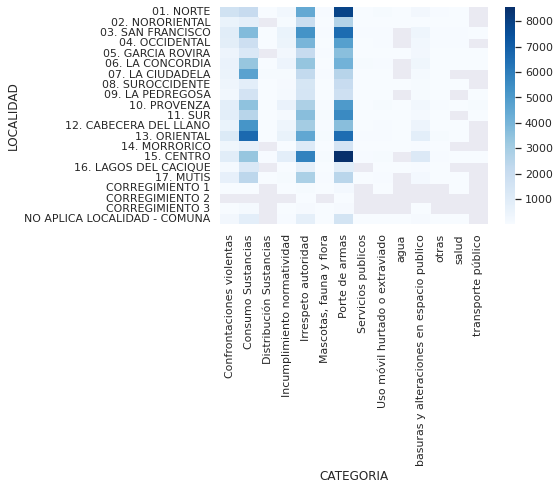

In [ ]:
# Heatmap pivot_table previous
sns.heatmap(df.pivot_table(index="LOCALIDAD", columns="CATEGORIA", aggfunc="count", values="FECHA_HECHOS"), cmap="Blues", xticklabels=True, yticklabels=True)

Porte de Armas, Irrespeto a la autoridad and Consumo Sustancias are the most common penalties fees in bucaramanga in the last five years.

<BarContainer object of 6 artists>

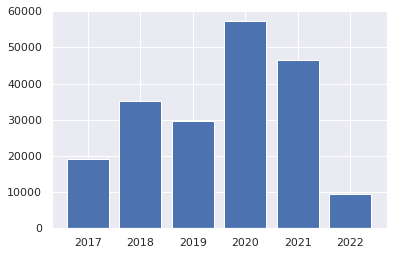

In [ ]:
# Barplot Num occurrency by year
plt.bar(df["AÑO_NUM"].value_counts().index, height=df["AÑO_NUM"].value_counts())

In [ ]:
df["FECHA_HECHOS"] = pd.to_datetime(df["FECHA_HECHOS"])
df["Period"]=df["FECHA_HECHOS"].dt.to_period("M")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


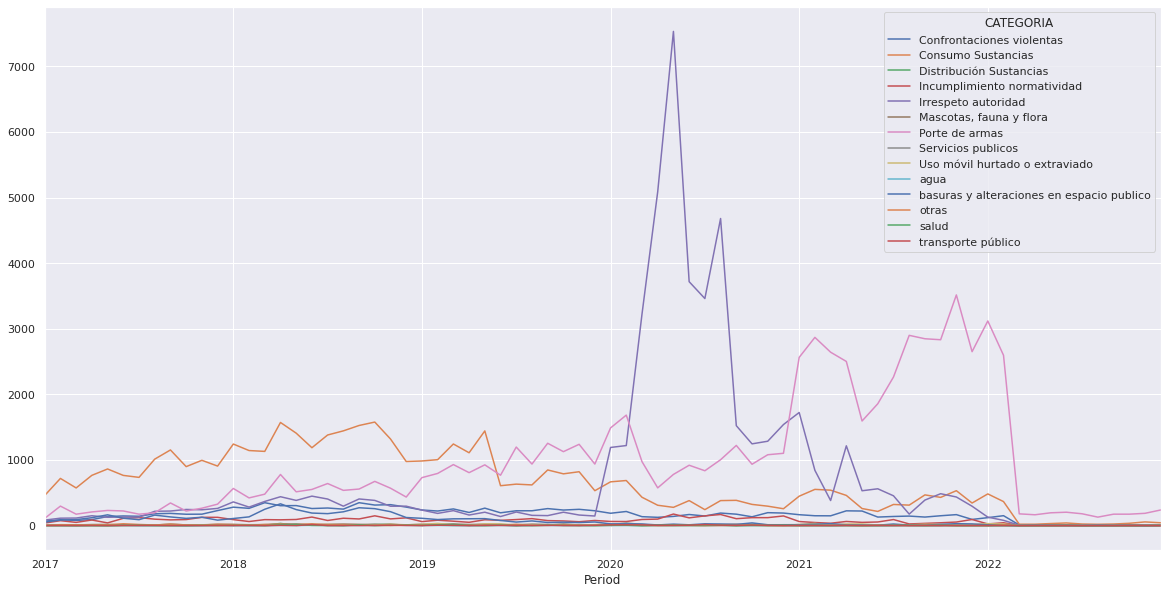

In [ ]:
df_periodos = pd.crosstab(index=df["Period"], columns=df["CATEGORIA"]).sort_index()
df_periodos

plt.rcParams["figure.figsize"] = (20,10)
df_periodos.plot()
plt.show()

In 2020 there is a increment in Irrespeto a la autoridad, curious considering that in 2020 the pandemic occurred.
Other thing interesting is the increment in porte de armas over the years.
Could be better make a individual plot for see the comportament for the differents categories.
But it's possible see that there are data after june 2022, so we goint to correct this values

In [ ]:
df["Fecha"]=df["AÑO_NUM"].astype(str)+"-"+df["MES_NUM"].astype(str)+"-"+df["DIA_NUM"].astype(str)
df["Fecha"] = pd.to_datetime(df["Fecha"], format='%Y-%m-%d')
df["Period"] = df["Fecha"].dt.to_period("M")
df[df["FECHA_HECHOS"]>"2022-05-01"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,FECHA_HECHOS,HORA_HECHOS,DIA_HECHOS,LOCALIDAD,BARRIO_HECHOS,SITIO,EDAD,NACIONALIDAD,CURSO_VIDA,CAPITULO,DESCRIPCIÓN_CAPÍTULO,NÚMERO_COMPORTAMIENTO,DESCRIPCIÓN_COMPORTAMIENTO,RANGO_HORARIO,AÑO_NUM,MES_NUM,DIA_NUM,CATEGORIA,Fecha,Period
0,30/01/2017,17:45:00,lunes,NO APLICA LOCALIDAD - COMUNA,SIN DATO,SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO,26,COLOMBIA,25-29,Cap. 1 - VIDA E INTEGRIDAD DE LAS PERSONAS,VIDA E INTEGRIDAD DE LAS PERSONAS,Num. 7,"Portar armas neumáticas, de aire, de fogueo, d...",17:00-17:59,2017,1,30,Porte de armas,2017-01-30,2017-01
1,30/01/2017,17:45:00,lunes,NO APLICA LOCALIDAD - COMUNA,SIN DATO,SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO,26,COLOMBIA,25-29,Cap. 1 - VIDA E INTEGRIDAD DE LAS PERSONAS,VIDA E INTEGRIDAD DE LAS PERSONAS,Num. 7,"Portar armas neumáticas, de aire, de fogueo, d...",17:00-17:59,2017,1,30,Porte de armas,2017-01-30,2017-01
2,30/01/2017,17:45:00,lunes,NO APLICA LOCALIDAD - COMUNA,SIN DATO,SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO,26,COLOMBIA,25-29,Cap. 1 - VIDA E INTEGRIDAD DE LAS PERSONAS,VIDA E INTEGRIDAD DE LAS PERSONAS,Num. 7,"Portar armas neumáticas, de aire, de fogueo, d...",17:00-17:59,2017,1,30,Porte de armas,2017-01-30,2017-01
488,21/06/2017,07:30:00,miércoles,13. ORIENTAL,MEJORAS PÚBLICAS,SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO,62,COLOMBIA,60-64,Cap. 2 - DEL CUIDADO E INTEGRIDAD DEL ESPACIO ...,DEL CUIDADO E INTEGRIDAD DEL ESPACIO PÚBLICO,Num. 7,"Consumir sustancias prohibidas en estadios, co...",7:00-7:59,2017,6,21,Consumo Sustancias,2017-06-21,2017-06
489,21/06/2017,07:30:00,miércoles,13. ORIENTAL,MEJORAS PÚBLICAS,SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO,62,COLOMBIA,60-64,Cap. 2 - DEL CUIDADO E INTEGRIDAD DEL ESPACIO ...,DEL CUIDADO E INTEGRIDAD DEL ESPACIO PÚBLICO,Num. 7,"Consumir sustancias prohibidas en estadios, co...",7:00-7:59,2017,6,21,Consumo Sustancias,2017-06-21,2017-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197436,26/02/2022,10:43:00,sábado,09. LA PEDREGOSA,SAN MARTÍN,SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO,39,COLOMBIA,35-39,Cap. 1 - VIDA E INTEGRIDAD DE LAS PERSONAS,VIDA E INTEGRIDAD DE LAS PERSONAS,Num. 6,"Portar armas, elementos cortantes, punzantes o...",10:00-10:59,2022,2,26,Porte de armas,2022-02-26,2022-02
197437,26/02/2022,10:43:00,sábado,09. LA PEDREGOSA,SAN MARTÍN,SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO,39,COLOMBIA,35-39,Cap. 1 - VIDA E INTEGRIDAD DE LAS PERSONAS,VIDA E INTEGRIDAD DE LAS PERSONAS,Num. 6,"Portar armas, elementos cortantes, punzantes o...",10:00-10:59,2022,2,26,Porte de armas,2022-02-26,2022-02
197438,23/02/2022,20:12:00,miércoles,05. GARCIA ROVIRA,CAMPO HERMOSO,SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO,33,COLOMBIA,30-34,Cap. 1 - VIDA E INTEGRIDAD DE LAS PERSONAS,VIDA E INTEGRIDAD DE LAS PERSONAS,Num. 6,"Portar armas, elementos cortantes, punzantes o...",20:00-20:59,2022,2,23,Porte de armas,2022-02-23,2022-02
197439,23/02/2022,20:12:00,miércoles,05. GARCIA ROVIRA,CAMPO HERMOSO,SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO,33,COLOMBIA,30-34,Cap. 1 - VIDA E INTEGRIDAD DE LAS PERSONAS,VIDA E INTEGRIDAD DE LAS PERSONAS,Num. 6,"Portar armas, elementos cortantes, punzantes o...",20:00-20:59,2022,2,23,Porte de armas,2022-02-23,2022-02


Now, make again the graph, but this time individually to have a best idea in every variable

In [ ]:
df_periodos = pd.crosstab(index=df["Period"], columns=df["CATEGORIA"]).sort_index()
df_periodos

CATEGORIA,Confrontaciones violentas,Consumo Sustancias,Distribución Sustancias,Incumplimiento normatividad,Irrespeto autoridad,"Mascotas, fauna y flora",Porte de armas,Servicios publicos,Uso móvil hurtado o extraviado,agua,basuras y alteraciones en espacio publico,otras,salud,transporte público
Period,,,,,,,,,,,,,,
2017-01,10,93,0,0,15,1,26,0,0,0,13,1,0,0
2017-02,82,759,0,53,102,10,411,2,0,1,104,21,0,0
2017-03,59,417,0,50,86,6,165,0,0,1,91,12,0,0
2017-04,89,755,3,94,112,20,153,2,0,0,129,7,0,1
2017-05,144,781,0,54,115,14,207,0,0,0,177,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10,150,413,0,38,148,1,3048,12,15,0,15,2,3,0
2021-11,145,570,0,26,131,16,3694,6,12,0,34,0,0,0
2021-12,110,324,0,159,155,10,2656,6,6,0,31,3,0,0


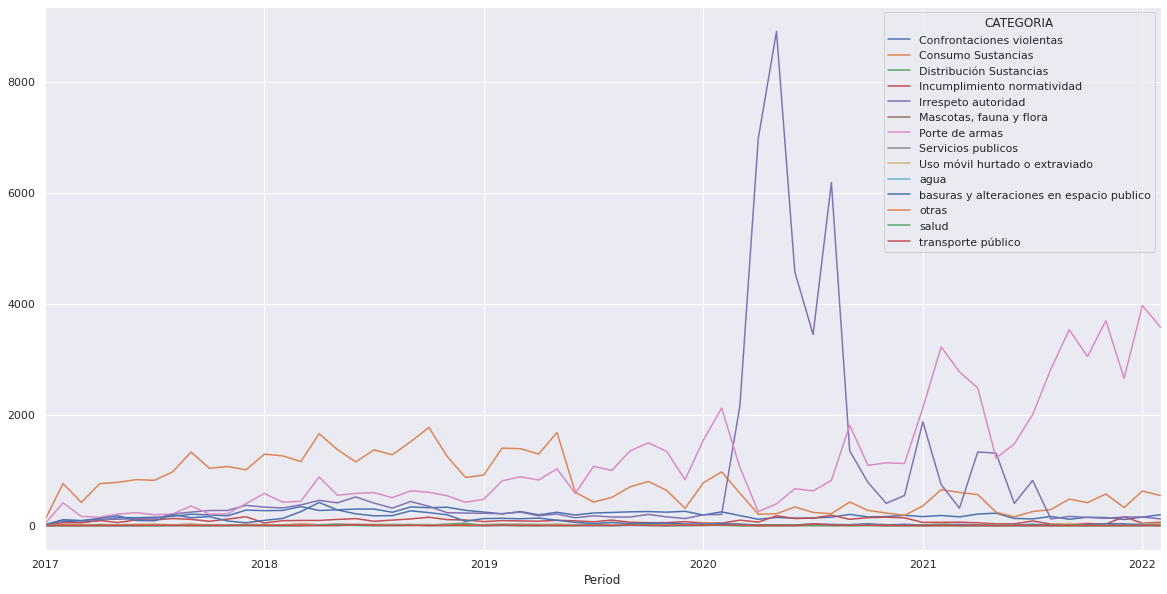

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
df_periodos.plot()
plt.show()

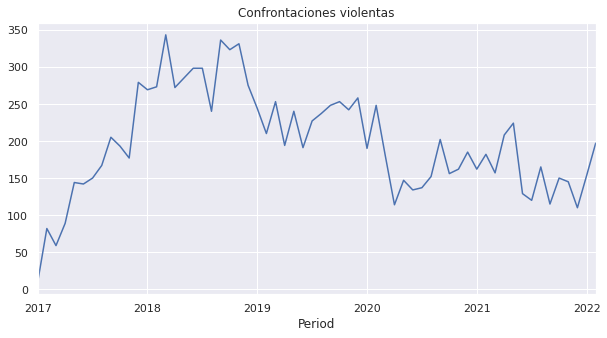

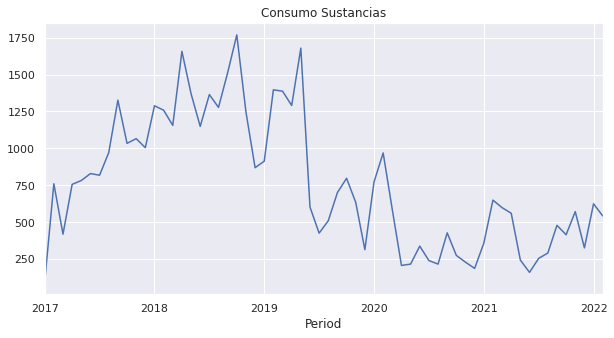

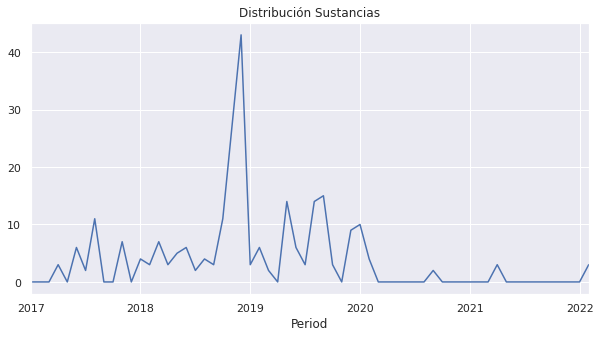

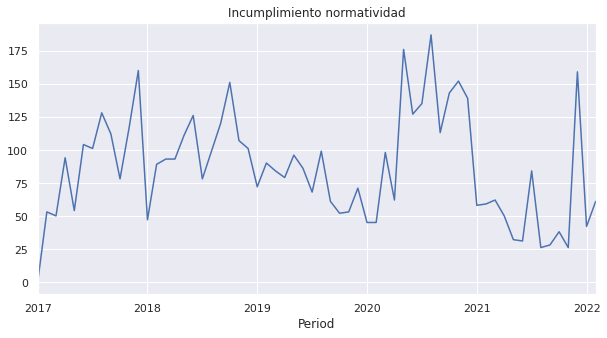

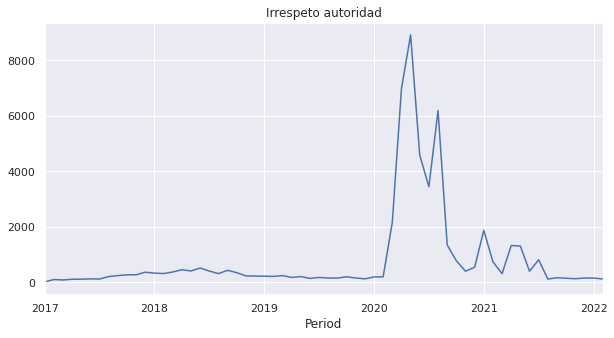

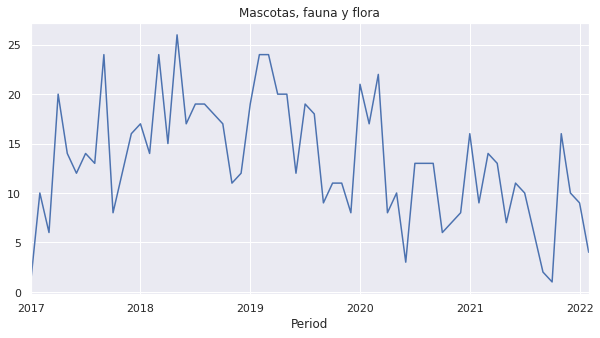

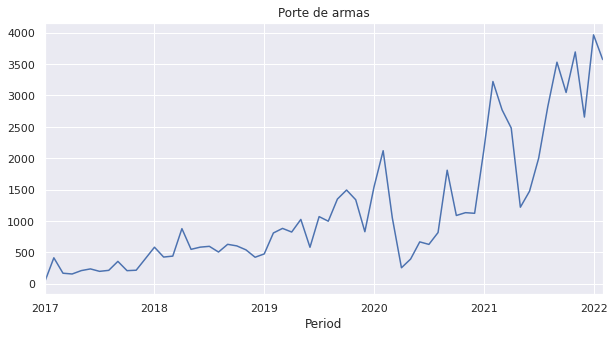

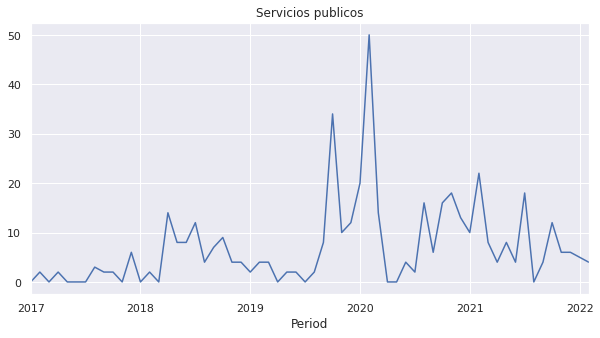

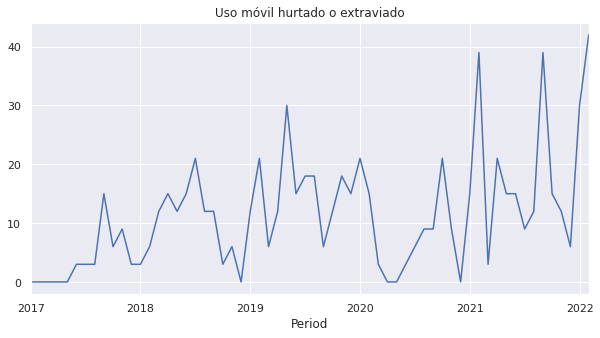

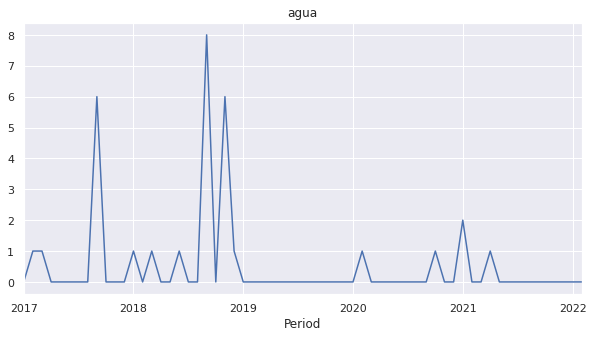

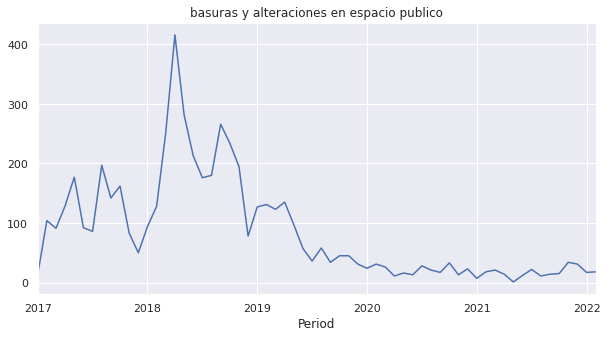

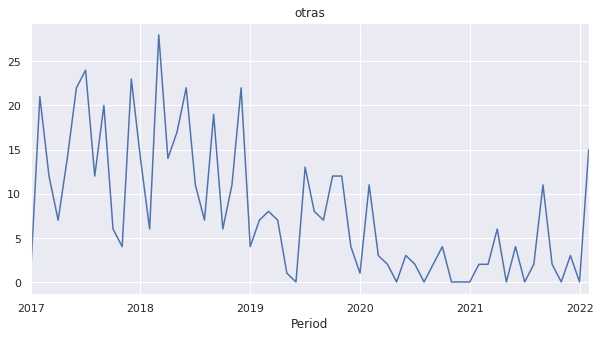

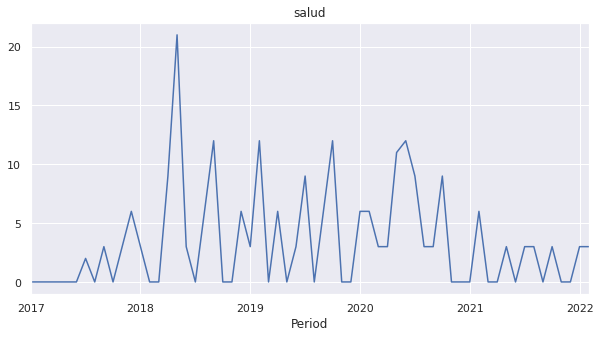

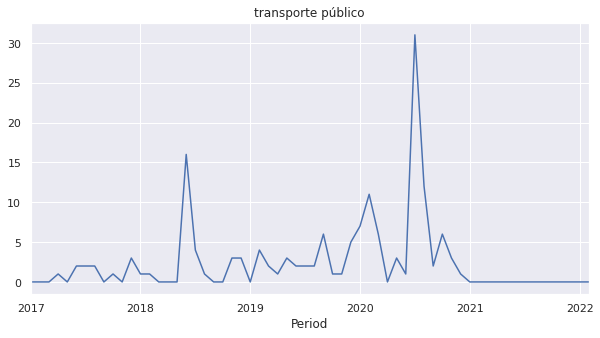

In [ ]:
df_periodos.columns
plt.rcParams["figure.figsize"] = (10,5)
for i in df_periodos.columns:
    df_periodos[i].plot()
    plt.title(i)
    plt.show()

Other thing is the age for this categories that we create, there is something inside, for this reason create a boxplot 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

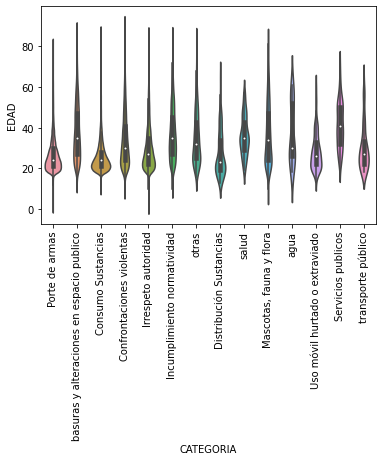

In [ ]:
sns.violinplot(data=df, x="CATEGORIA", y="EDAD")
plt.xticks(rotation=90)

"consumo de sustancias" and "Porte de armas" have a similar graph, but in general the ages show different behaviours

Now it's important see the different neighborhoods in Bucaramanga and the behaviour with some variables

In [ ]:
#location shape
shape_1 = fiona.open("/content/drive/MyDrive/Team 111 DS4A - Project/Data/Barrios bga/Barrios-polygon.shp")
# Build the GeoDataFrame from Fiona Collection
gdf = gpd.GeoDataFrame.from_features([feature for feature in shape_1])
# Get the order of the fields in the Fiona Collection; add geometry to the end
columns = list(shape_1.meta["schema"]["properties"]) + ["geometry"]
# Re-order columns in the correct order
gdf = gdf[columns]

In [ ]:
mapa_medidas_correctivas = gdf[["NOMBRE","geometry"]]

In [ ]:
df_barrios = pd.crosstab(index=df["BARRIO_HECHOS"], columns=df["CATEGORIA"]).sort_index()
df_barrios.reset_index()

CATEGORIA,BARRIO_HECHOS,Confrontaciones violentas,Consumo Sustancias,Distribución Sustancias,Incumplimiento normatividad,Irrespeto autoridad,"Mascotas, fauna y flora",Porte de armas,Servicios publicos,Uso móvil hurtado o extraviado,agua,basuras y alteraciones en espacio publico,otras,salud,transporte público
0,10 DE MAYO SANTA BÁRBARA,0,99,0,0,28,1,15,0,0,0,2,0,0,0
1,12 DE OCTUBRE,25,12,0,4,30,1,102,0,0,0,4,0,0,0
2,13 DE JUNIO,11,27,0,0,26,0,39,0,0,0,0,0,0,0
3,20 DE JULIO,8,0,0,0,2,4,6,0,0,0,0,0,0,0
4,23 DE JUNIO,9,37,0,0,112,0,114,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,VILLA SARA,3,4,0,0,29,0,27,0,0,0,0,0,0,0
274,"VILLAS DE SAN IGNACIO (SECTORES BAVARIA I, II,...",66,80,0,12,283,4,616,0,12,1,13,2,3,0
275,VIVEROS DE PROVENZA,4,2,0,4,34,0,6,4,0,0,0,0,0,0
276,ÁFRICA,0,0,0,2,0,0,3,0,0,0,0,0,0,0


In [ ]:
mapa_medidas_correctivas = mapa_medidas_correctivas.merge(right=df_barrios, left_on="NOMBRE", right_on="BARRIO_HECHOS")

In [ ]:
variables = ["Confrontaciones violentas", "Consumo Sustancias", "Distribución Sustancias", "Irrespeto autoridad", "Porte de armas"]
mapa_medidas_correctivas

,NOMBRE,geometry,Confrontaciones violentas,Consumo Sustancias,Distribución Sustancias,Incumplimiento normatividad,Irrespeto autoridad,"Mascotas, fauna y flora",Porte de armas,Servicios publicos,Uso móvil hurtado o extraviado,agua,basuras y alteraciones en espacio publico,otras,salud,transporte público
0,12 DE OCTUBRE,"POLYGON ((-73.13641 7.11880, -73.13633 7.11882...",25,12,0,4,30,1,102,0,0,0,4,0,0,0
1,13 DE JUNIO,"POLYGON ((-73.13098 7.15081, -73.13102 7.15072...",11,27,0,0,26,0,39,0,0,0,0,0,0,0
2,23 DE JUNIO,"POLYGON ((-73.13718 7.11779, -73.13717 7.11781...",9,37,0,0,112,0,114,0,0,0,3,0,0,0
3,ALBANIA,"POLYGON ((-73.10564 7.13009, -73.10566 7.13001...",51,55,0,2,109,5,256,0,3,0,4,0,0,0
4,ALTOS DEL CACIQUE,"POLYGON ((-73.09688 7.09917, -73.09700 7.09920...",0,0,0,0,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,VIJAGUAL,"POLYGON ((-73.12909 7.20308, -73.12909 7.20308...",1,0,0,2,3,0,12,0,0,0,0,0,0,0
142,BOSCONIA,"POLYGON ((-73.11275 7.15373, -73.11277 7.15373...",8,6,0,2,134,0,42,0,0,0,1,0,0,0
143,CONDADO DE GIBRALTAR,"POLYGON ((-73.12629 7.08669, -73.12631 7.08669...",0,0,0,0,2,0,0,0,0,0,0,0,0,0
144,LOS CUADROS,"POLYGON ((-73.11660 7.14637, -73.11653 7.14638...",1,0,0,4,9,0,6,0,0,0,0,0,0,0


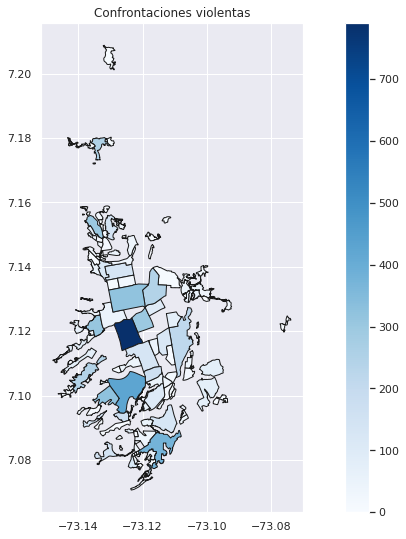

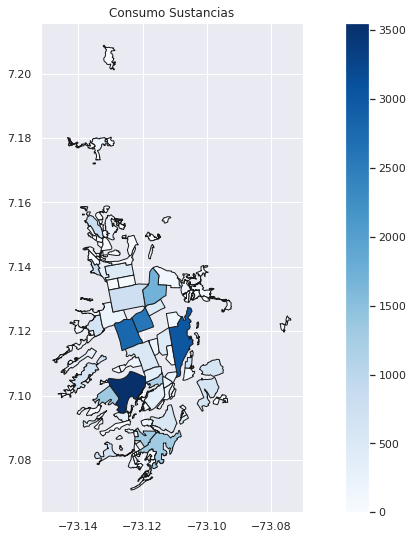

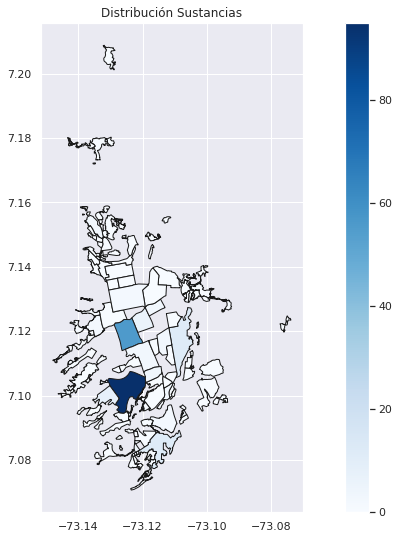

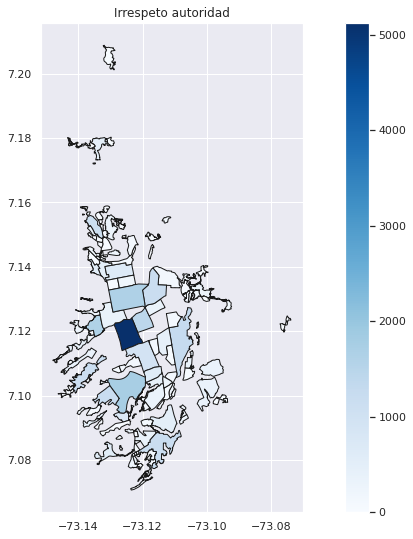

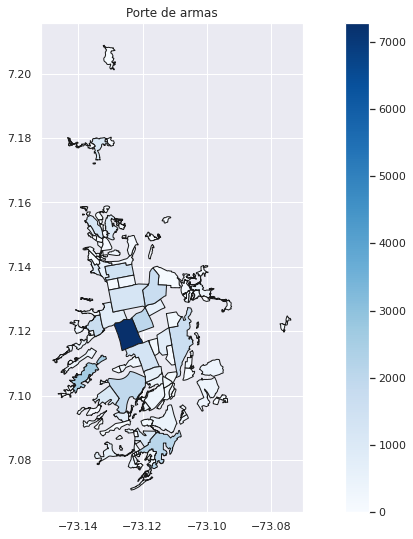

In [ ]:
for i in variables:
    plt.rcParams["figure.figsize"] = (15,9)
    mapa_medidas_correctivas.plot(column=i, cmap="Blues", edgecolor='k', legend=True)
    plt.title(i)

## **Defunciones en Bucaramanga**

In [ ]:
# Load data
defunciones = pd.read_csv("/content/drive/MyDrive/Team 111 DS4A - Project/Data/DEFUNCIONES_MUNICIPIO_DE_BUCARAMANGA.csv")
defunciones.head()

,orden,DEPARTAMENTO,MUNICIPIO,AREA DEFUNCIÓN,SITIO DEFUNCIÓN,NOMBRE INSTITUCIÓN,TIPO DEFUNCIÓN,FECHA DEFUNCIÓN,DIA,MES,...,PAÍS RESIDENCIA,DEPARTAMENTO RESIDENCIA,MUNICIPIO RESIDENCIA,AREA RESIDENCIA,BARRIO,RÉGIMEN SEGURIDAD,TIPO ADMINISTRADORA,NOMBRE ADMINISTRADORA,PROBABLE MANERA MUERTE,EXPEDIDO POR
0,1,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,SIN INFORMACIÓN,NO FETAL,01/01/2018 12:00:00 AM,lunes,enero,...,COLOMBIA,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,JOSE ANTONIO GALAN,NO ASEGURADO,SIN INFORMACIÓN,SIN INFORMACIÓN,VIOLENTA,MÉDICO LEGISTA
1,2,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,CASA/DOMICILIO,SIN INFORMACIÓN,NO FETAL,01/01/2018 12:00:00 AM,lunes,enero,...,COLOMBIA,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,SAN FRANCISCO,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,SALUD TOTAL SA ENTIDAD PROMOTORA DE SALUD,NATURAL,MÉDICO NO TRATANTE
2,3,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,680010341801 LOS COMUNEROS HOSPITAL UNIVERSITA...,NO FETAL,01/01/2018 12:00:00 AM,lunes,enero,...,COLOMBIA,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,CIUDADELA REAL DE MINAS,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,COOMEVA EPS SA,NATURAL,MÉDICO TRATANTE
3,4,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,680010079201 HOSPITAL UNIVERSITARIO DE SANTANDER,NO FETAL,01/01/2018 12:00:00 AM,lunes,enero,...,COLOMBIA,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,GIRARDOT,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,NUEVA EPS SA,NATURAL,MÉDICO TRATANTE
4,5,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,CASA/DOMICILIO,SIN INFORMACIÓN,NO FETAL,01/01/2018 12:00:00 AM,lunes,enero,...,COLOMBIA,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,VILLA ALEGRIA,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,COOSALUD ESS - ARS COOPERATIVA EMPRESA SOLIDA...,NATURAL,MÉDICO NO TRATANTE


In [ ]:
defunciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19700 entries, 0 to 19699
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   orden                      19700 non-null  int64 
 1   DEPARTAMENTO               19700 non-null  object
 2   MUNICIPIO                  19700 non-null  object
 3   AREA DEFUNCIÓN             19700 non-null  object
 4   SITIO DEFUNCIÓN            19700 non-null  object
 5   NOMBRE INSTITUCIÓN         19700 non-null  object
 6   TIPO DEFUNCIÓN             19700 non-null  object
 7   FECHA DEFUNCIÓN            19700 non-null  object
 8   DIA                        19700 non-null  object
 9   MES                        19700 non-null  object
 10  AÑO                        19700 non-null  int64 
 11  HORA DEFUNCIÓN             19700 non-null  object
 12  SEXO FALLECIDO             19700 non-null  object
 13  ESTADO CONYUGAL FALLECIDO  19700 non-null  object
 14  EDAD F

In [ ]:
defunciones.MES = defunciones.MES.replace({"enero": 1, "febrero": 2, "marzo": 3, "abril": 4,"mayo": 5, "junio": 6, "julio": 7, "agosto": 8,"septiembre": 9, "octubre": 10,"noviembre": 11, "diciembre": 12,})

The first objective of this analysis is to give a global vision about the conditions of deaths in Bucaramanga. With this data, it is important to explore which are the most probable causes of death and make a more deep analysis of this. Where and when the people die and try to find relationship between causes and population affected.

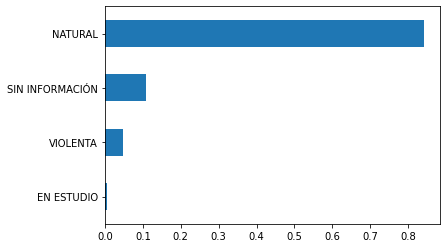

In [ ]:
defunciones["PROBABLE MANERA MUERTE"].value_counts(ascending=True,normalize=True).plot.barh()

In this first plot we can see that violent deaths are less of 10% of total reported deaths and natural causes are more than 80%. For a better analysis we will focus the analysis on violent deaths

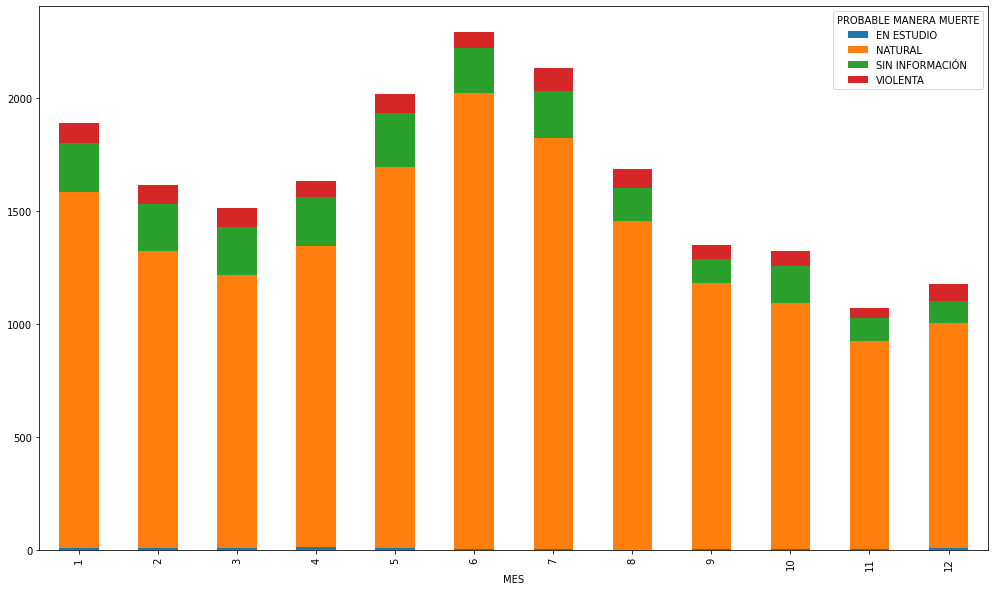

In [ ]:
defun_month = defunciones.groupby(["PROBABLE MANERA MUERTE", "MES"])["orden"].count().reset_index().sort_values(["orden", "MES"], ascending = (False, True))
defun_month = defun_month.pivot_table(index = "MES", columns = "PROBABLE MANERA MUERTE", values = "orden").reset_index().set_index("MES")
defun_month.plot(kind = 'bar', stacked = True, figsize = (17,10))

With this graph, we can see that exist a possible correlation between the probable causes of death throughout the year. In the months of May, June and July more deaths were reported.

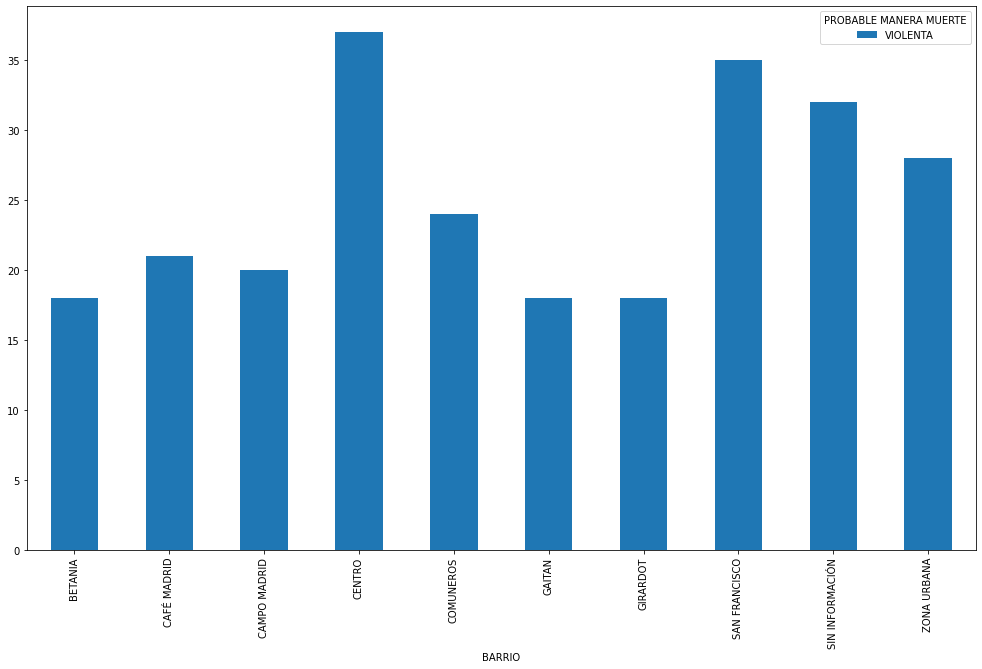

In [ ]:
defun_neigh = defunciones[defunciones["PROBABLE MANERA MUERTE"] == "VIOLENTA"].groupby(["PROBABLE MANERA MUERTE", "BARRIO"])["orden"].count().reset_index().sort_values(["orden", "BARRIO"], ascending = (False, True)).head(10)
defun_neigh = defun_neigh.pivot_table(index = "BARRIO", columns = "PROBABLE MANERA MUERTE", values = "orden").reset_index().set_index("BARRIO")
defun_neigh.plot(kind = 'bar', stacked = True, figsize = (17,10))

This particular plot show us what neighborhoods suffer more of violent deaths(Top 10). It will be interesting to analyze the percentage of vulnerable people that live there and make a connection with the crimes database.

In [ ]:
defun_neigh = defunciones[defunciones["PROBABLE MANERA MUERTE"] == "VIOLENTA"].groupby(["PROBABLE MANERA MUERTE", "SITIO DEFUNCIÓN"])["orden"].count().reset_index().sort_values(["orden", "SITIO DEFUNCIÓN"], ascending = (False, True))
defun_neigh = defun_neigh.pivot_table(index = "SITIO DEFUNCIÓN", columns = "PROBABLE MANERA MUERTE", values = "orden").reset_index().set_index("SITIO DEFUNCIÓN")
defun_neigh.sort_index()

PROBABLE MANERA MUERTE,VIOLENTA
SITIO DEFUNCIÓN,
CASA/DOMICILIO,138
CENTRO/PUESTO DE SALUD,9
HOSPITAL/CLÍNICA,483
LUGAR DE TRABAJO,6
OTRO SITIO,54
SIN INFORMACIÓN,4
VÍA PÚBLICA,215


In this table, we can see the relations between the violence deaths and where died. This relation can give a hint about the timely care of these persons. It will be interesting to connect this data table with the neighborhood 